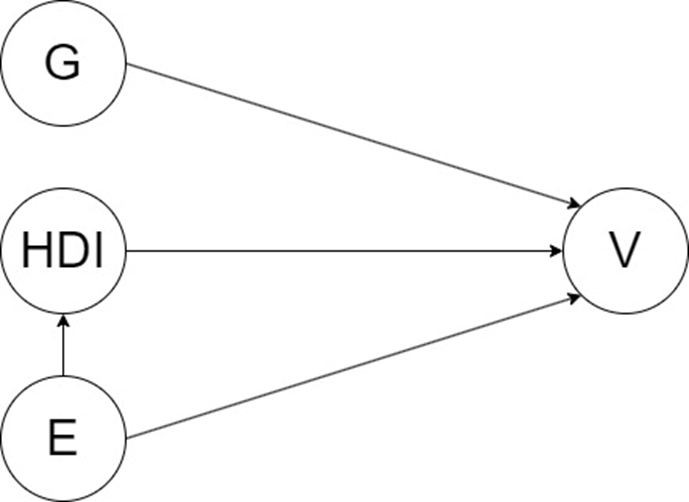

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import seaborn as sns
import arviz as az


file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)

data.head()

,Year,State,Democratic %,Gun ownership %,HDI,Unemployment %
0,1992,Alabama,40.9,55.2,0.839,7.525
1,1996,Alabama,43.2,56.8,0.850,5.208
2,2000,Alabama,41.6,53.8,0.853,4.625
3,2004,Alabama,36.8,51.6,0.861,5.575
4,2008,Alabama,38.7,50.3,0.867,5.883


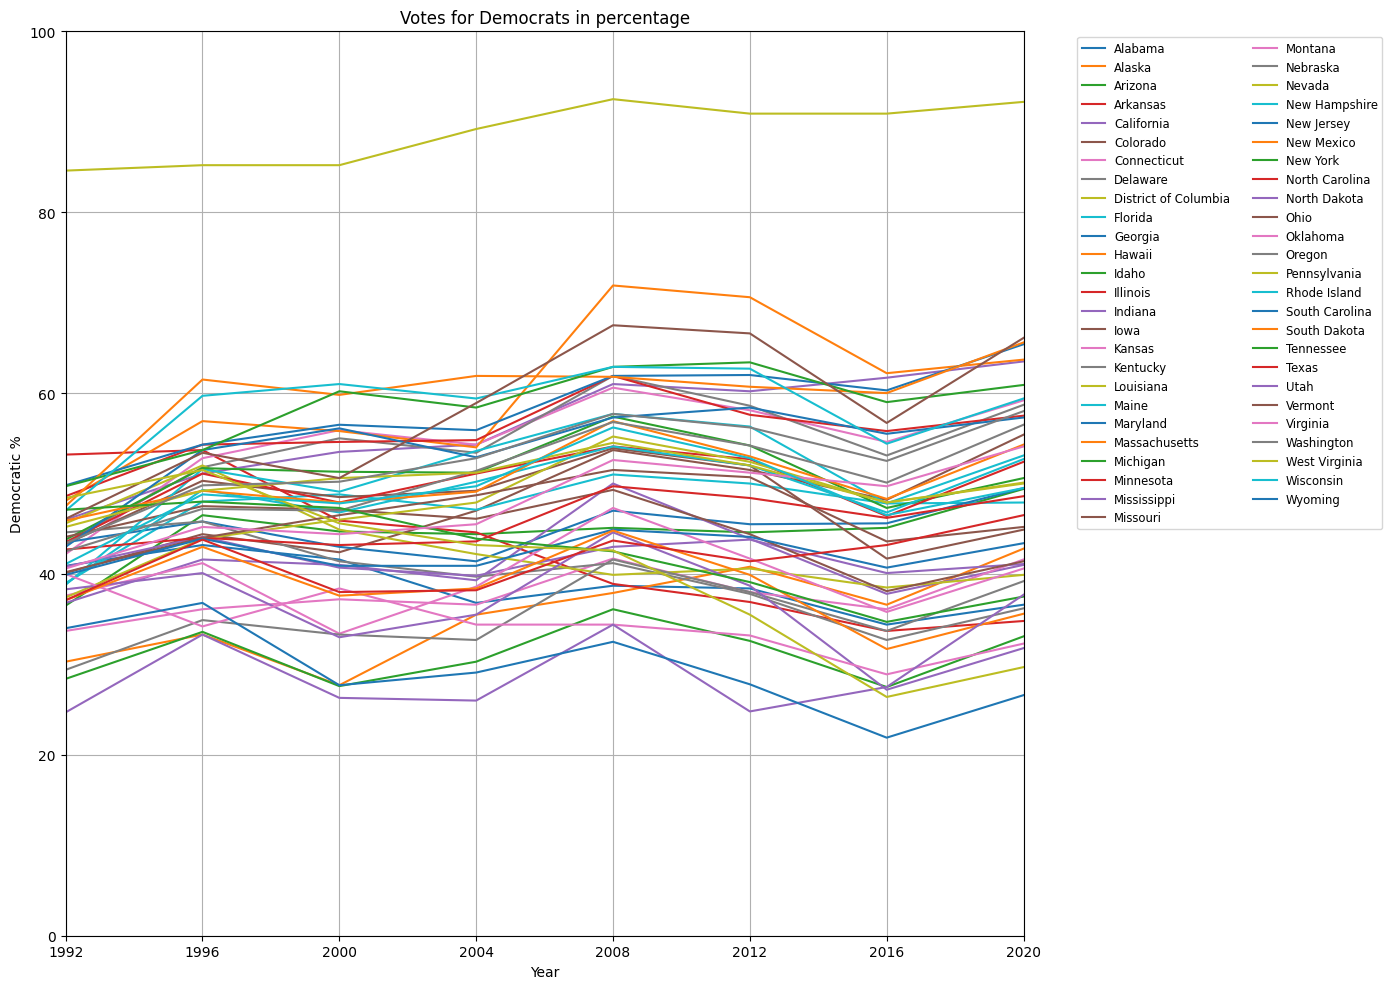

In [25]:
plt.figure(figsize=(14, 10))

for state in data["State"].unique():
    state_data = data[data["State"] == state]
    plt.plot(state_data["Year"], state_data["Democratic %"], label=state)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.xticks(np.linspace(1992, 2020, 8))
plt.xlim([1992, 2020])
plt.ylim([0, 100])
plt.show()

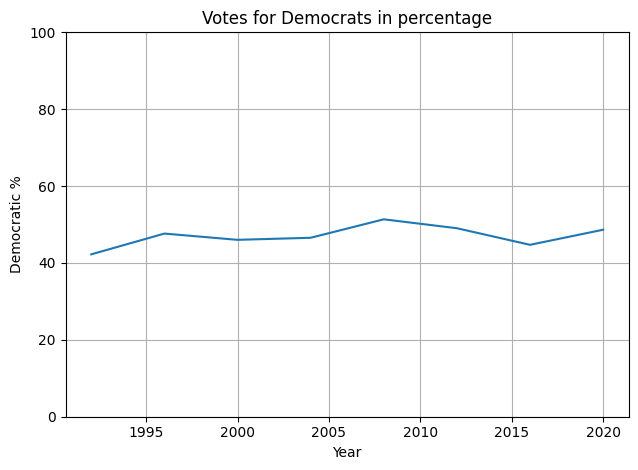

In [26]:
mean_democratic_votes = [data[data['Year'] == year]['Democratic %'].mean() for year in data["Year"].unique()]

plt.plot(data["Year"].unique(), mean_democratic_votes)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.grid(True)
plt.tight_layout()
plt.ylim([0, 100])
plt.show()

## Checking the correlations between the predictors

In [37]:
file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)

data = data.dropna()

# Calculate the correlation matrix
correlation_matrix = data[['HDI', 'Gun ownership %', 'Unemployment %', 'Democratic %']].corr()

print(correlation_matrix)

                      HDI  Gun ownership %  Unemployment %  Democratic %
HDI              1.000000        -0.444153       -0.046894      0.337227
Gun ownership % -0.444153         1.000000       -0.135404     -0.766783
Unemployment %  -0.046894        -0.135404        1.000000      0.236900
Democratic %     0.337227        -0.766783        0.236900      1.000000


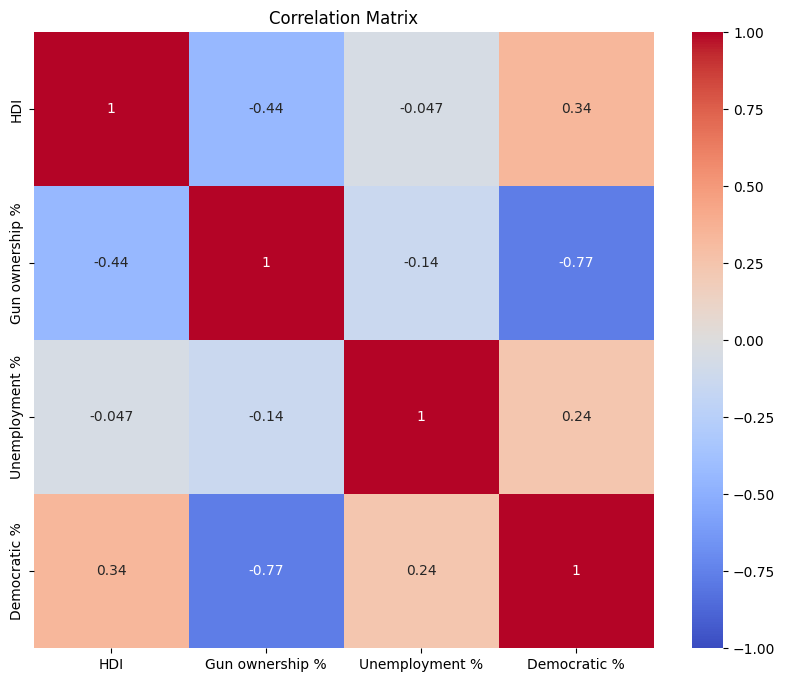

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

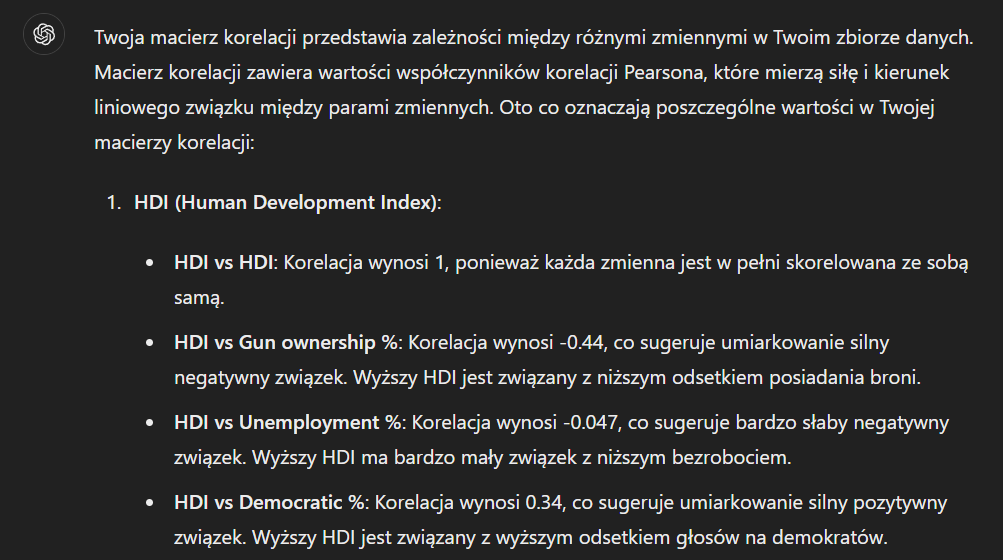
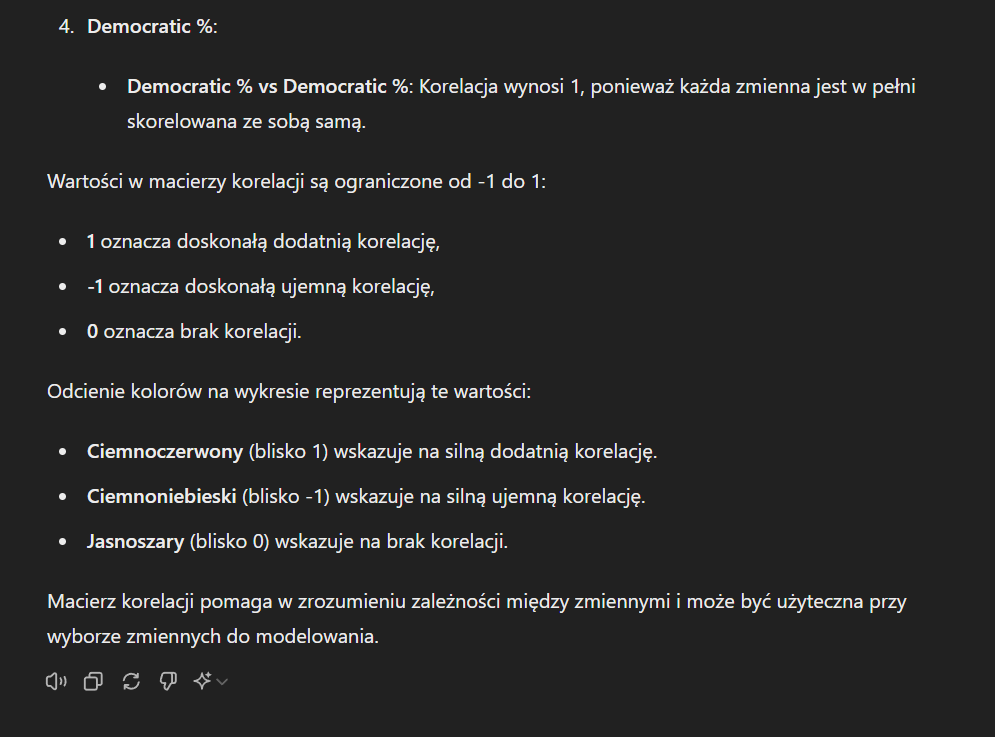
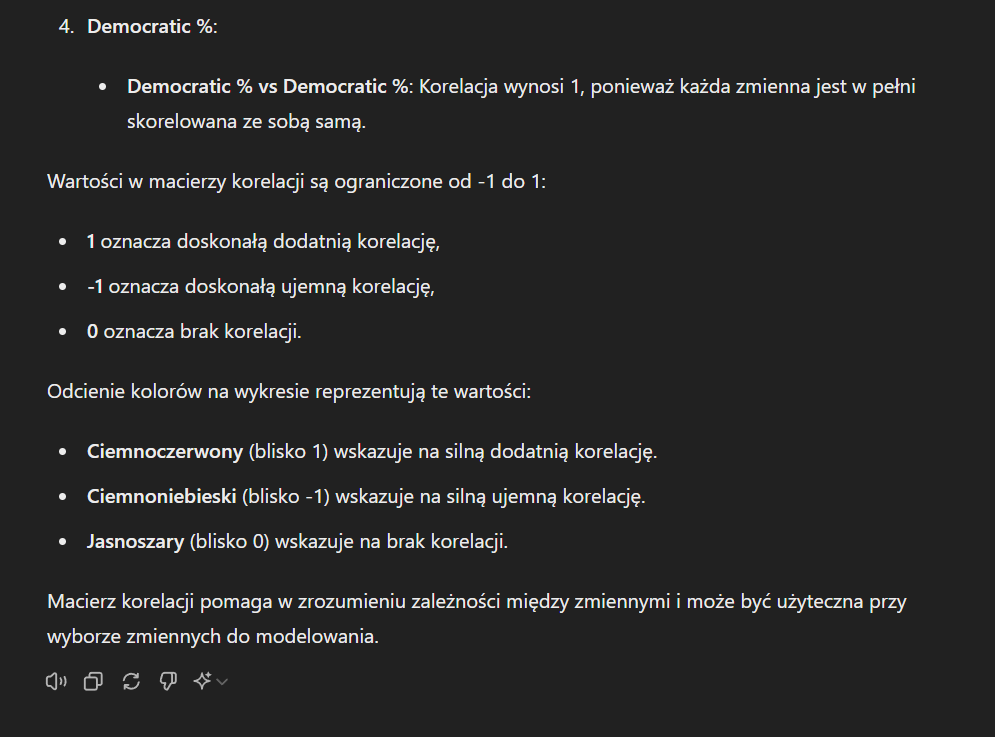

## Normal distributions of the data available

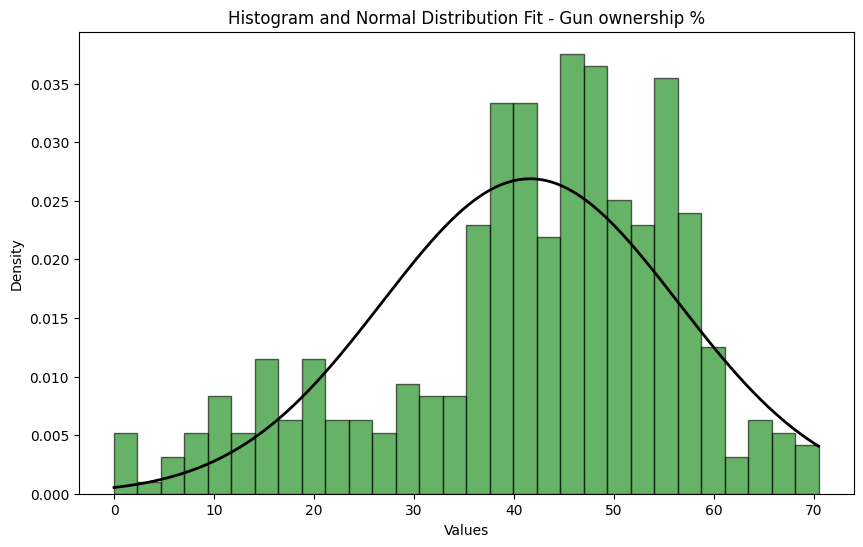

(41.635294117647064, 14.843232412210844)

In [29]:
from scipy.stats import norm
# Oblicz średnią i odchylenie standardowe
data_values = data['Gun ownership %'].values

mean = np.mean(data_values)
std_dev = np.std(data_values)

# Utwórz dane dla wykresu PDF
x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

# Wyświetl histogram i wykres rozkładu normalnego
plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit - Gun ownership %')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

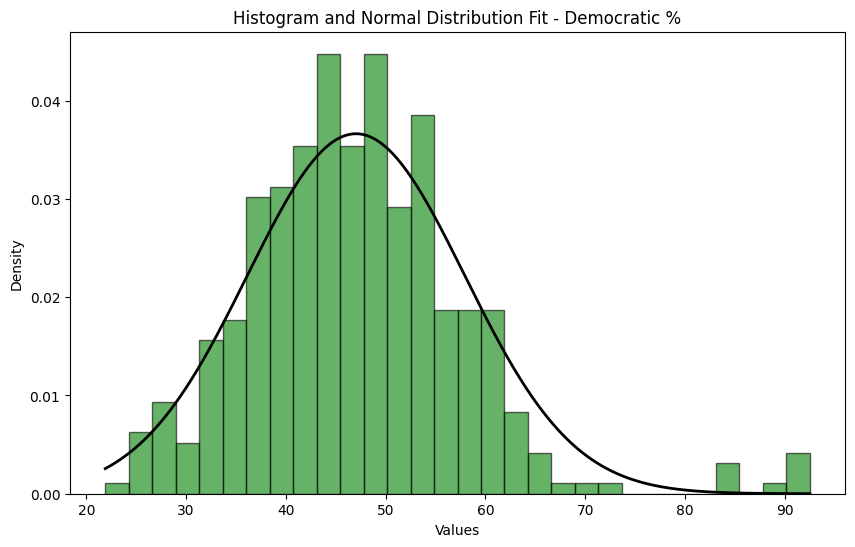

(47.02867647058824, 10.888367880955116)

In [31]:
import pandas as pd

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data_values = data['Democratic %'].values
# Oblicz średnią i odchylenie standardowe
mean = np.mean(data_values)
std_dev = np.std(data_values)

# Utwórz dane dla wykresu PDF
x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

# Wyświetl histogram i wykres rozkładu normalnego
plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit - Democratic %')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

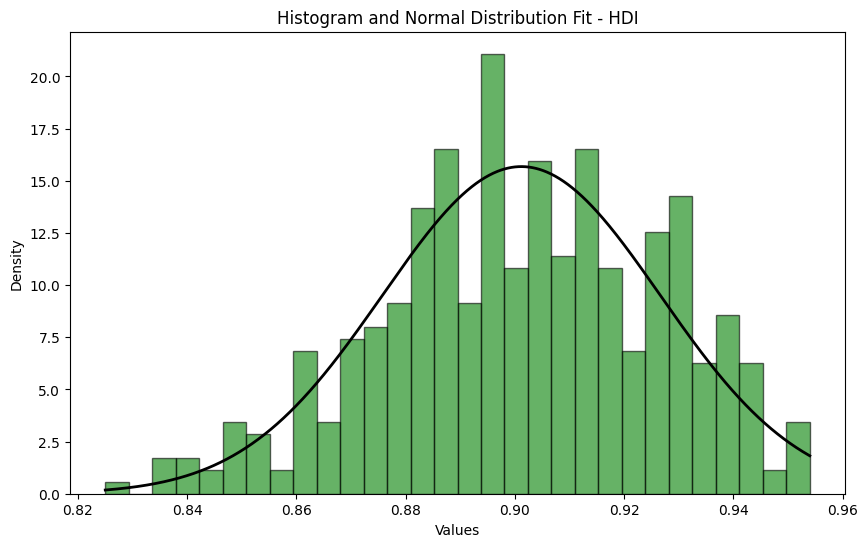

(0.9011813725490196, 0.02544277404406379)

In [32]:
import pandas as pd

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data_values = data['HDI'].values
# Oblicz średnią i odchylenie standardowe
mean = np.mean(data_values)
std_dev = np.std(data_values)

# Utwórz dane dla wykresu PDF
x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

# Wyświetl histogram i wykres rozkładu normalnego
plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit - HDI')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

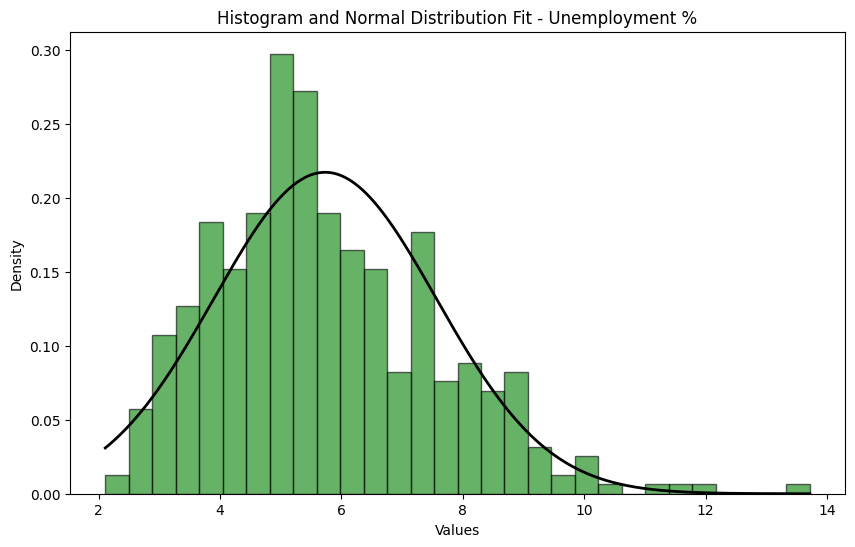

(5.730723039215687, 1.8344195906518317)

In [33]:
import pandas as pd

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data_values = data['Unemployment %'].values
# Oblicz średnią i odchylenie standardowe
mean = np.mean(data_values)
std_dev = np.std(data_values)

# Utwórz dane dla wykresu PDF
x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

# Wyświetl histogram i wykres rozkładu normalnego
plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit - Unemployment %')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Wczytaj dane
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Przygotowanie danych
X = data[['HDI', 'Gun ownership %', 'Unemployment %']]
y = data['Democratic %']

# Dodanie stałej (intercept)
X = sm.add_constant(X)

# Dopasowanie modelu liniowego
model = sm.OLS(y, X).fit()

# Wyświetlenie podsumowania modelu
print(model.summary())

# Obliczenie reszt
residuals = model.resid

# Obliczenie wariancji resztowej
residual_variance = np.var(residuals, ddof=1)

# Obliczenie odchylenia standardowego szumu (sigma)
sigma = np.sqrt(residual_variance)

print(f"Estimated sigma: {sigma}")

                            OLS Regression Results                            
Dep. Variable:           Democratic %   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     207.3
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           2.26e-81
Time:                        20:20:05   Log-Likelihood:                 515.89
No. Observations:                 408   AIC:                            -1024.
Df Residuals:                     404   BIC:                            -1008.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5958      0.142     

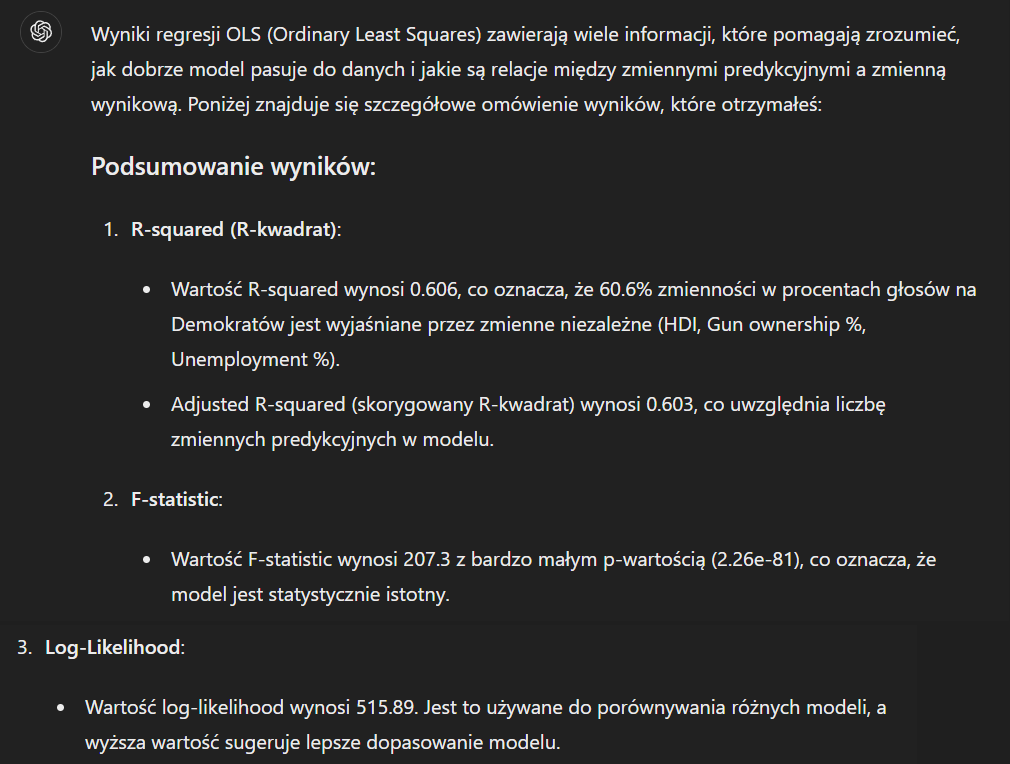
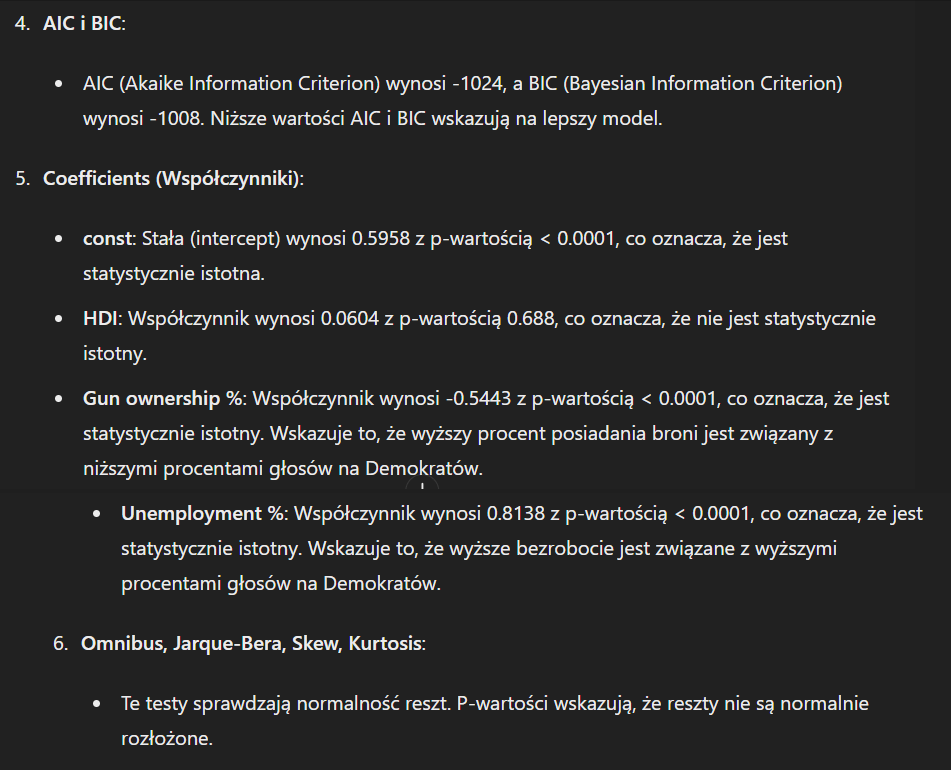
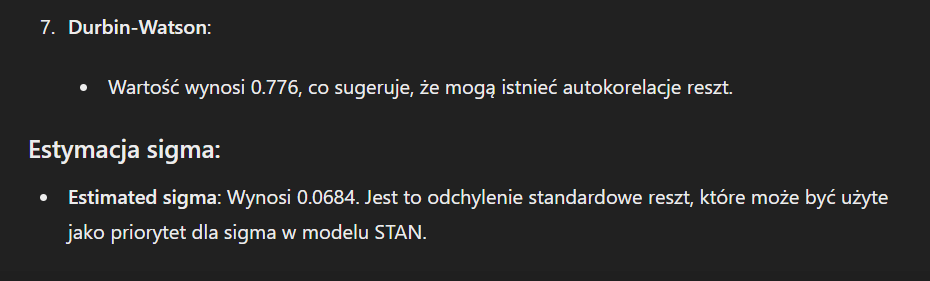

## 1st model - linear model with 3 predictors

In [18]:
import pandas as pd
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

# Load the data
file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

# Prepare data for prior predictive check
stan_data_prior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values
}

# Compile and run the prior predictive model
stan_file_prior = 'model_1_pp.stan'
model_prior = CmdStanModel(stan_file=stan_file_prior)
fit_prior = model_prior.sample(data=stan_data_prior, chains=4, seed=28052020, show_console=True)

17:09:10 - cmdstanpy - INFO - Chain [1] start processing
17:09:10 - cmdstanpy - INFO - Chain [2] start processing
17:09:10 - cmdstanpy - INFO - Chain [3] start processing
17:09:10 - cmdstanpy - INFO - Chain [4] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmpvrclpr02\1_6kpahe.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

17:09:11 - cmdstanpy - INFO - Chain [2] done processing
17:09:11 - cmdstanpy - INFO - Chain [3] done processing
17:09:11 - cmdstanpy - INFO - Chain [1] done processing
17:09:11 - cmdstanpy - INFO - Chain [4] done processing


Chain [4] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [2] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [3] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [4] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [2] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 0.037 seconds (Warm-up)
Chain [2] 1.038 seconds (Sampling)
Chain [2] 1.075 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [3] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampli

## Prior Predictive Checks for Parameters

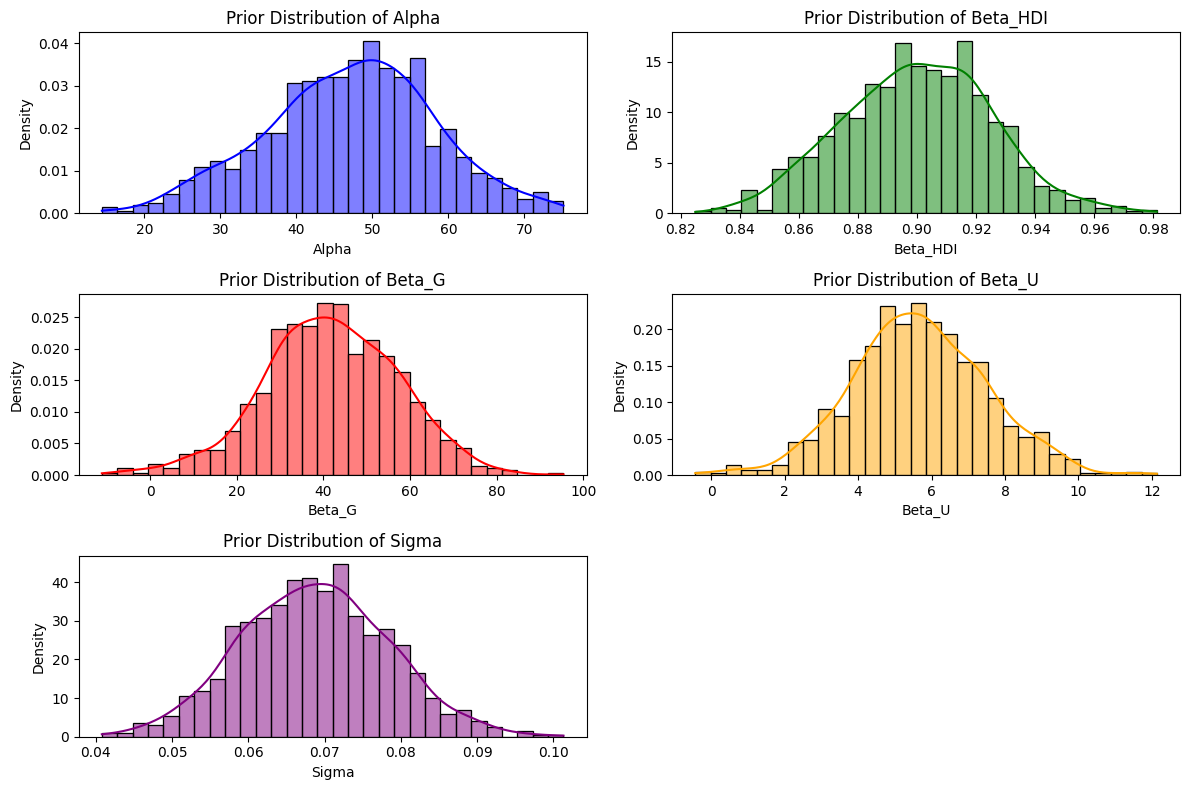

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate parameter values from the priors
n_samples = 1000
alpha_prior = np.random.normal(47, 10.88, n_samples)
beta_1_prior = np.random.normal(0.901, 0.025, n_samples)
beta_2_prior = np.random.normal(41.63, 14.848, n_samples)
beta_3_prior = np.random.normal(5.73, 1.83, n_samples)
sigma_prior = np.random.normal(0.0684, 0.01, n_samples)

# Ensure sigma values are positive
sigma_prior = sigma_prior[sigma_prior > 0]

# Create a DataFrame for easier manipulation
priors_df = pd.DataFrame({
    'Alpha': alpha_prior,
    'Beta_HDI': beta_1_prior,
    'Beta_G': beta_2_prior,
    'Beta_U': beta_3_prior,
    'Sigma': sigma_prior
})

# Plot the distributions of the simulated prior values using seaborn
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

sns.histplot(priors_df['Alpha'], bins=30, kde=True, stat="density", ax=axes[0, 0], color='blue').set_title('Prior Distribution of Alpha')
sns.histplot(priors_df['Beta_HDI'], bins=30, kde=True, stat="density", ax=axes[0, 1], color='green').set_title('Prior Distribution of Beta_HDI')
sns.histplot(priors_df['Beta_G'], bins=30, kde=True, stat="density", ax=axes[1, 0], color='red').set_title('Prior Distribution of Beta_G')
sns.histplot(priors_df['Beta_U'], bins=30, kde=True, stat="density", ax=axes[1, 1], color='orange').set_title('Prior Distribution of Beta_U')
sns.histplot(priors_df['Sigma'], bins=30, kde=True, stat="density", ax=axes[2, 0], color='purple').set_title('Prior Distribution of Sigma')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

       Democratic %  Gun ownership %         HDI  Unemployment %
count    408.000000       408.000000  408.000000      408.000000
mean      47.028676        41.635294    0.901181        5.730723
std       10.901736        14.861456    0.025474        1.836672
min       21.900000         0.000000    0.825000        2.108000
25%       39.975000        35.675000    0.884750        4.454000
50%       46.450000        44.650000    0.902000        5.458500
75%       53.250000        52.225000    0.920250        6.854250
max       92.500000        70.500000    0.954000       13.717000


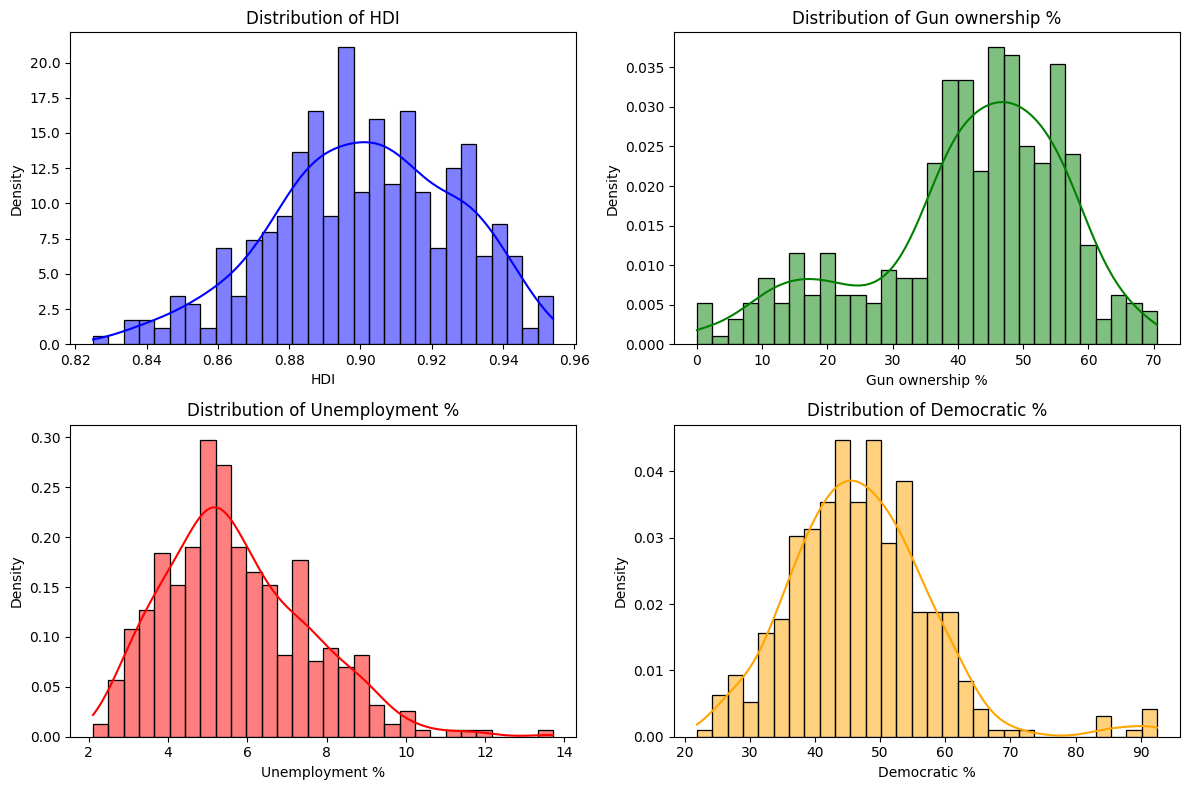

In [37]:
import pandas as pd

# Load the data
file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

# Check descriptive statistics
print(data.describe())

# Plot the distributions of actual data
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data['HDI'], bins=30, kde=True, stat="density", ax=axes[0, 0], color='blue').set_title('Distribution of HDI')
sns.histplot(data['Gun ownership %'], bins=30, kde=True, stat="density", ax=axes[0, 1], color='green').set_title('Distribution of Gun ownership %')
sns.histplot(data['Unemployment %'], bins=30, kde=True, stat="density", ax=axes[1, 0], color='red').set_title('Distribution of Unemployment %')
sns.histplot(data['Democratic %'], bins=30, kde=True, stat="density", ax=axes[1, 1], color='orange').set_title('Distribution of Democratic %')

plt.tight_layout()
plt.show()


## Prior Predictive Checks

       Democratic %  Gun ownership %         HDI  Unemployment %
count    408.000000       408.000000  408.000000      408.000000
mean      47.028676        41.635294    0.901181        5.730723
std       10.901736        14.861456    0.025474        1.836672
min       21.900000         0.000000    0.825000        2.108000
25%       39.975000        35.675000    0.884750        4.454000
50%       46.450000        44.650000    0.902000        5.458500
75%       53.250000        52.225000    0.920250        6.854250
max       92.500000        70.500000    0.954000       13.717000


14:51:15 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\model_1_pp.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model_1_pp.exe
14:51:50 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model_1_pp.exe
14:51:50 - cmdstanpy - INFO - Chain [1] start processing
14:51:50 - cmdstanpy - INFO - Chain [2] start processing
14:51:50 - cmdstanpy - INFO - Chain [3] start processing
14:51:50 - cmdstanpy - INFO - Chain [4] start processing


Chain [1] method = sample (Default)
Chain [2] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmpbzwe_ul6\3t463dsn.json
Chain [1] init = 2 (D

14:51:51 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [4] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [3] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [2] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [4] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [3] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [2] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 0.054 seconds (Warm-up)
Chain [1] 0.881 seconds (Sampling)
Chain [1] 0.935 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 


14:51:51 - cmdstanpy - INFO - Chain [4] done processing
14:51:51 - cmdstanpy - INFO - Chain [3] done processing
14:51:51 - cmdstanpy - INFO - Chain [2] done processing


Chain [4] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [4] 
Chain [4] Elapsed Time: 0.062 seconds (Warm-up)
Chain [4] 0.886 seconds (Sampling)
Chain [4] 0.948 seconds (Total)
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [3] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [3] 
Chain [3] Elapsed Time: 0.055 seconds (Warm-up)
Chain [3] 0.903 seconds (Sampling)
Chain [3] 0.958 seconds (Total)
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain 

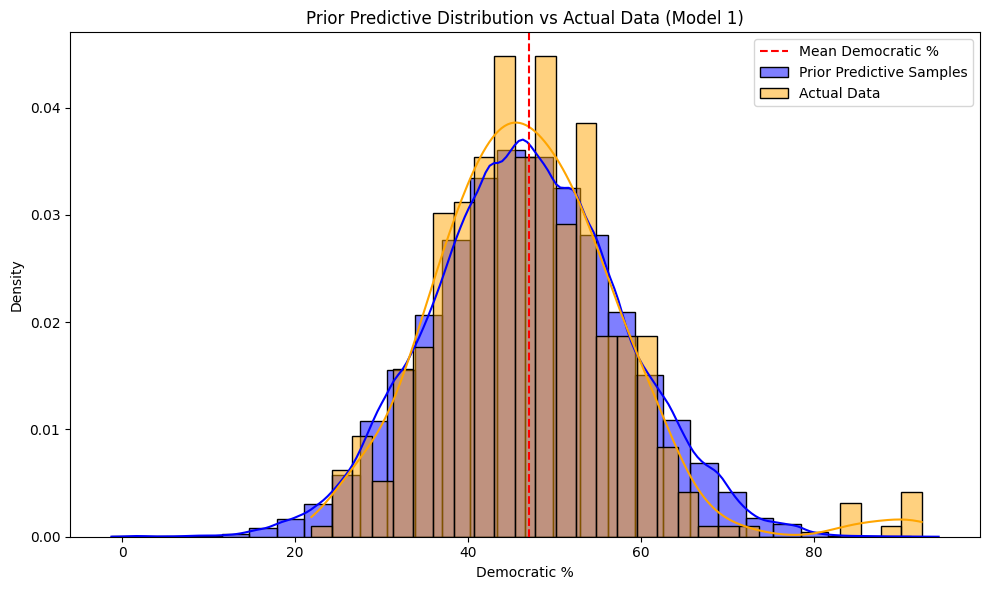

Mean Democratic %: 47.02867647058824
Min Democratic %: 21.9
Max Democratic %: 92.5


In [5]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

# Display basic statistics of the data
print(data.describe())

# Prepare data for prior predictive check
stan_data_prior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values
}

# Compile and run the prior predictive model
stan_file_prior = 'model_1_pp.stan'
model_prior = CmdStanModel(stan_file=stan_file_prior)
fit_prior = model_prior.sample(data=stan_data_prior, chains=4, seed=28052020, show_console=True)

# Extract prior predictive samples
y_rep_prior = fit_prior.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')
y_rep_prior_flat = y_rep_prior.values.flatten()

# Plot the prior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", label='Prior Predictive Samples', color='blue')
sns.histplot(data['Democratic %'].values, bins=30, kde=True, stat="density", label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution vs Actual Data (Model 1)')
plt.tight_layout()
plt.show()

print(f"Mean Democratic %: {mean_democratic_pct}")
print(f"Min Democratic %: {data['Democratic %'].min()}")
print(f"Max Democratic %: {data['Democratic %'].max()}")

## Posterior Predictive Distribution Analysis - model 1

14:53:25 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\model1_posterior.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model1_posterior.exe
14:54:10 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model1_posterior.exe
14:54:11 - cmdstanpy - INFO - Chain [1] start processing
14:54:11 - cmdstanpy - INFO - Chain [2] start processing
14:54:11 - cmdstanpy - INFO - Chain [3] start processing
14:54:11 - cmdstanpy - INFO - Chain [4] start processing


Chain [2] method = sample (Default)
Chain [2] sample
Chain [2] num_samples = 1000 (Default)
Chain [2] num_warmup = 1000 (Default)
Chain [2] save_warmup = 0 (Default)
Chain [2] thin = 1 (Default)
Chain [2] adapt
Chain [2] engaged = 1 (Default)
Chain [2] gamma = 0.05 (Default)
Chain [2] delta = 0.8 (Default)
Chain [2] kappa = 0.75 (Default)
Chain [2] t0 = 10 (Default)
Chain [2] init_buffer = 75 (Default)
Chain [2] term_buffer = 50 (Default)
Chain [2] window = 25 (Default)
Chain [2] save_metric = 0 (Default)
Chain [2] algorithm = hmc (Default)
Chain [2] hmc
Chain [2] engine = nuts (Default)
Chain [2] nuts
Chain [2] max_depth = 10 (Default)
Chain [2] metric = diag_e (Default)
Chain [2] metric_file =  (Default)
Chain [2] stepsize = 1 (Default)
Chain [2] stepsize_jitter = 0 (Default)
Chain [2] num_chains = 1 (Default)
Chain [2] id = 2
Chain [2] data
Chain [2] file = C:\Users\szczy\AppData\Local\Temp\tmpbzwe_ul6\cw0x4hn6.json
Chain [2] init = 2 (Default)
Chain [2] random
Chain [2] seed = 47
C

14:54:13 - cmdstanpy - INFO - Chain [1] done processing


Chain [2] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 1.188 seconds (Warm-up)
Chain [1] 1.624 seconds (Sampling)
Chain [1] 2.812 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [3] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [4] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [2] Iteration: 1900 / 2000 [ 95%]  (Sampling)


14:54:14 - cmdstanpy - INFO - Chain [4] done processing
14:54:14 - cmdstanpy - INFO - Chain [2] done processing
14:54:14 - cmdstanpy - INFO - Chain [3] done processing


Chain [4] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [4] 
Chain [4] Elapsed Time: 1.26 seconds (Warm-up)
Chain [4] 1.826 seconds (Sampling)
Chain [4] 3.086 seconds (Total)
Chain [4] 
Chain [3] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [2] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 1.318 seconds (Warm-up)
Chain [2] 1.831 seconds (Sampling)
Chain [2] 3.149 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [3] Iteration: 2000 / 2000

14:54:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)


Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmpbzwe_ul6\model1_posteriorfd2zg5jf\model1_posterior-20240702145411_1.csv, C:\Users\szczy\AppData\Local\Temp\tmpbzwe_ul6\model1_posteriorfd2zg5jf\model1_posterior-20240702145411_2.csv, C:\Users\szczy\AppData\Local\Temp\tmpbzwe_ul6\model1_posteriorfd2zg5jf\model1_posterior-20240702145411_3.csv, C:\Users\szczy\AppData\Local\Temp\tmpbzwe_ul6\model1_posteriorfd2zg5jf\model1_posterior-20240702145411_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



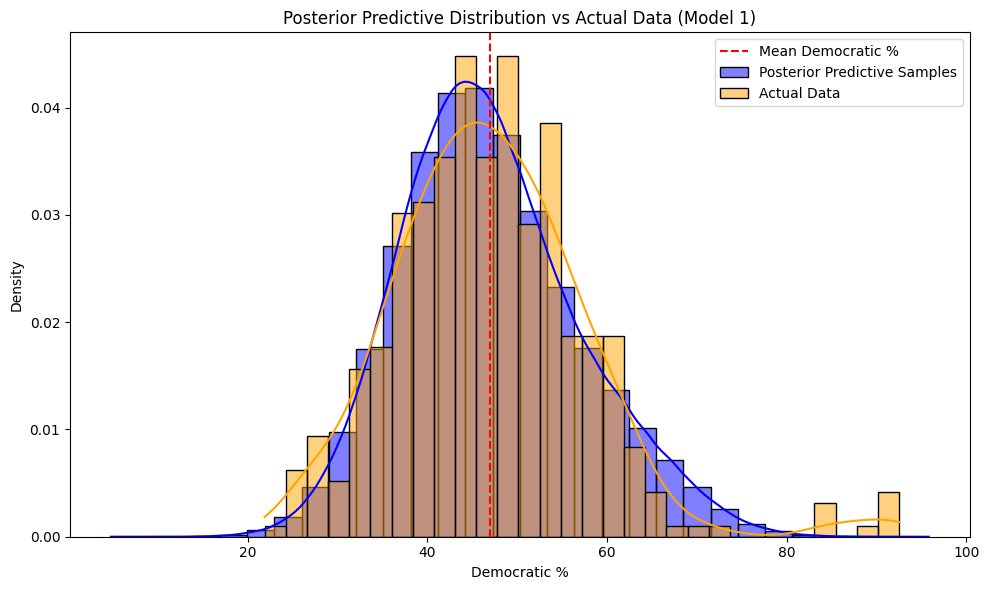

In [6]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

# Prepare data for posterior predictive check
stan_data_posterior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
    'y': data['Democratic %'].values
}

# Compile and run the posterior predictive model
stan_file_posterior = 'model1_posterior.stan'
model_posterior = CmdStanModel(stan_file=stan_file_posterior)
fit_posterior = model_posterior.sample(data=stan_data_posterior, chains=4, seed=47, show_console=True)
print(fit_posterior.diagnose())

# Extract posterior predictive samples
y_rep_posterior = fit_posterior.draws_pd()
y_rep_posterior = y_rep_posterior.filter(regex='y_rep')

# Flatten the values for plotting
y_rep_posterior_flat = y_rep_posterior.values.flatten()
actual_data_flat = data['Democratic %'].values

# Plot the posterior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')
sns.histplot(actual_data_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution vs Actual Data (Model 1)')
plt.tight_layout()
plt.show()

## Consistency with Data

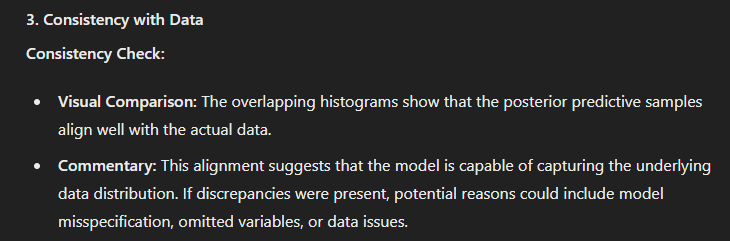

## Parameter Marginal Distributions

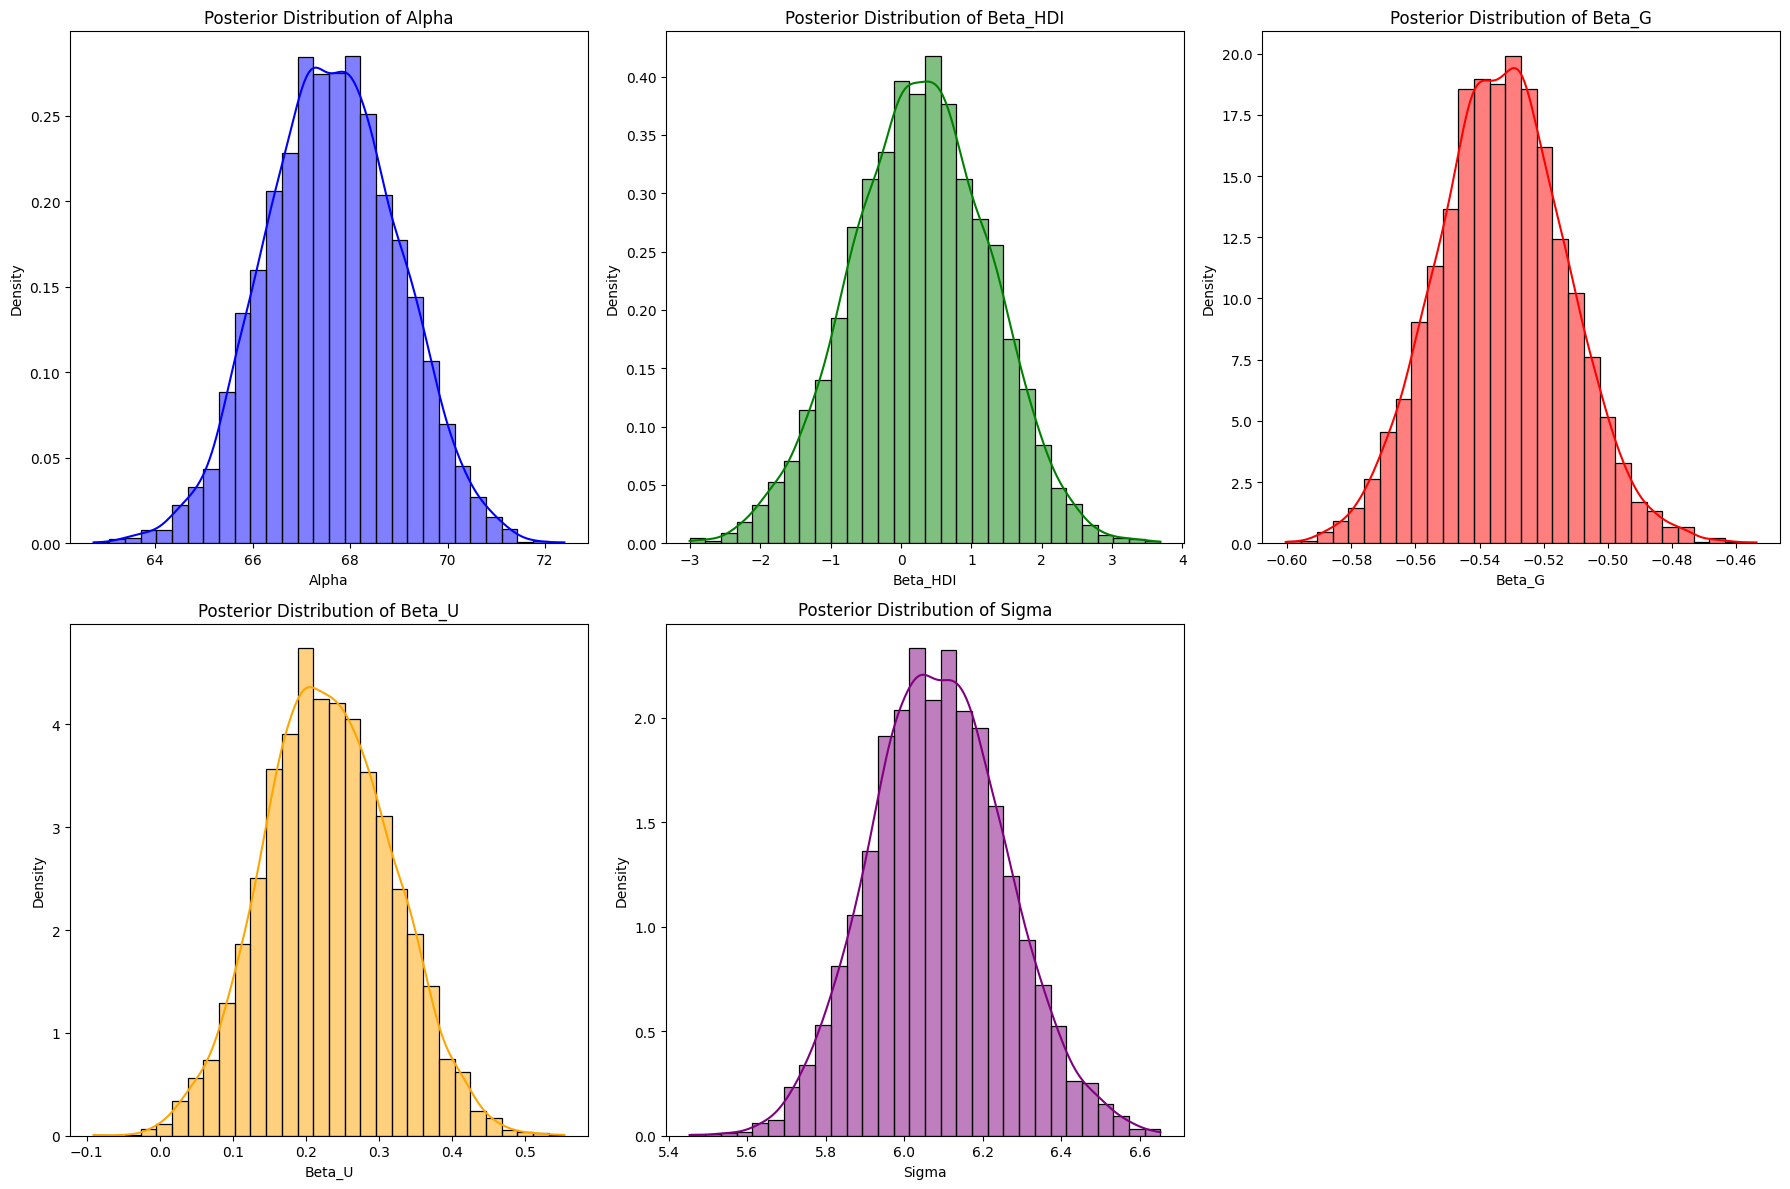

           count       mean       std        min        25%        50%  \
Alpha     4000.0  67.639103  1.355637  62.738600  66.706675  67.633700   
Beta_HDI  4000.0   0.269288  0.978706  -3.007280  -0.405963   0.279181   
Beta_G    4000.0  -0.533032  0.020062  -0.600468  -0.546395  -0.533222   
Beta_U    4000.0   0.230618  0.086700  -0.090707   0.170258   0.228215   
Sigma     4000.0   6.088605  0.172245   5.452770   5.969263   6.086005   

                75%        max  
Alpha     68.556975  72.397100  
Beta_HDI   0.939543   3.687080  
Beta_G    -0.519886  -0.453638  
Beta_U     0.290944   0.553322  
Sigma      6.202958   6.652710  


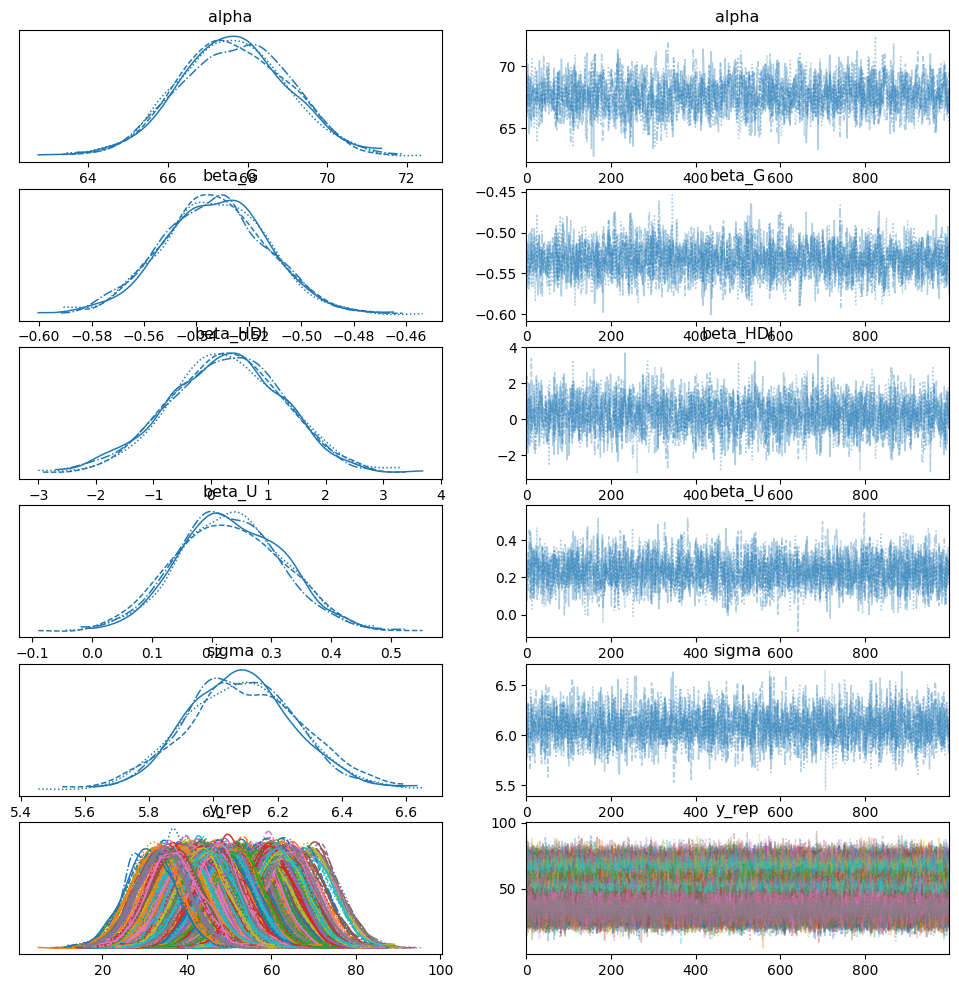

Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmpbzwe_ul6\model1_posteriorfd2zg5jf\model1_posterior-20240702145411_1.csv, C:\Users\szczy\AppData\Local\Temp\tmpbzwe_ul6\model1_posteriorfd2zg5jf\model1_posterior-20240702145411_2.csv, C:\Users\szczy\AppData\Local\Temp\tmpbzwe_ul6\model1_posteriorfd2zg5jf\model1_posterior-20240702145411_3.csv, C:\Users\szczy\AppData\Local\Temp\tmpbzwe_ul6\model1_posteriorfd2zg5jf\model1_posterior-20240702145411_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [7]:
# Extract parameter samples for alpha, beta_HDI, beta_G, beta_U, and sigma
alpha_samples = fit_posterior.stan_variable('alpha')
beta_HDI_samples = fit_posterior.stan_variable('beta_HDI')
beta_G_samples = fit_posterior.stan_variable('beta_G')
beta_U_samples = fit_posterior.stan_variable('beta_U')
sigma_samples = fit_posterior.stan_variable('sigma')

# Create a DataFrame for easier manipulation
params_df = pd.DataFrame({
    'Alpha': alpha_samples,
    'Beta_HDI': beta_HDI_samples,
    'Beta_G': beta_G_samples,
    'Beta_U': beta_U_samples,
    'Sigma': sigma_samples
})

# Set the number of bins
bins = 30

# Plot histograms of the parameters using seaborn
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.histplot(params_df['Alpha'], bins=bins, kde=True, ax=axes[0, 0], stat="density", color='blue').set_title('Posterior Distribution of Alpha')
sns.histplot(params_df['Beta_HDI'], bins=bins, kde=True, ax=axes[0, 1], stat="density", color='green').set_title('Posterior Distribution of Beta_HDI')
sns.histplot(params_df['Beta_G'], bins=bins, kde=True, ax=axes[0, 2], stat="density", color='red').set_title('Posterior Distribution of Beta_G')
sns.histplot(params_df['Beta_U'], bins=bins, kde=True, ax=axes[1, 0], stat="density", color='orange').set_title('Posterior Distribution of Beta_U')
sns.histplot(params_df['Sigma'], bins=bins, kde=True, ax=axes[1, 1], stat="density", color='purple').set_title('Posterior Distribution of Sigma')

# Remove the empty subplot (axes[1, 2])
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Summarize the parameters
params_summary = params_df.describe().T
print(params_summary)

# Generate trace plots to check for convergence issues
import arviz as az
az.plot_trace(fit_posterior)
plt.show()

# Calculate and display the diagnostics
print(fit_posterior.diagnose())

## Testing our final model

Best Seed: 96
Best MSE: 2.6468815909467347


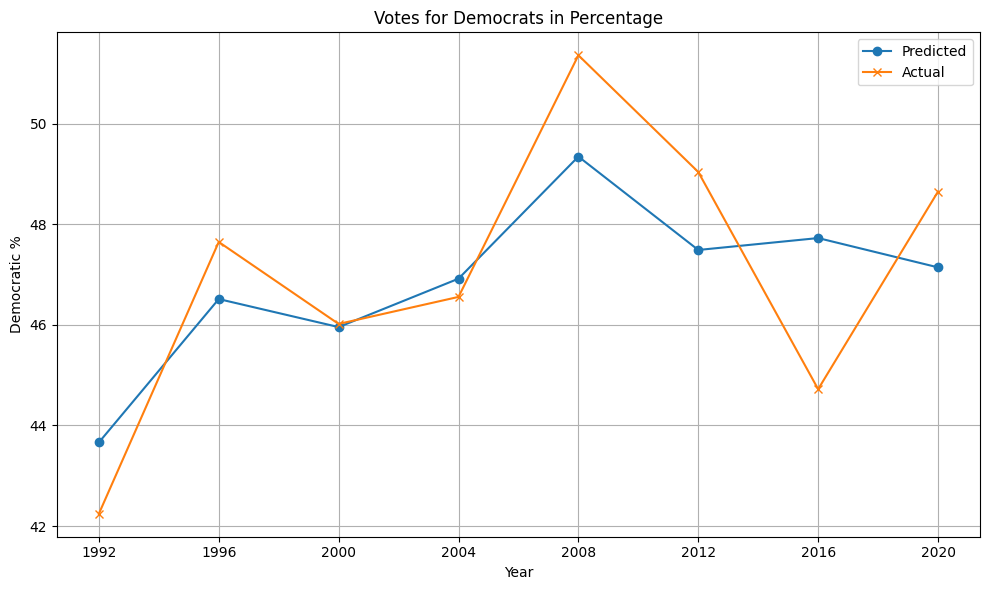

In [10]:
file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

# Function to evaluate model with a given seed
def evaluate_model_with_seed(seed, data, y_rep_posterior):
    np.random.seed(seed)
    
    # Extract predicted values from the posterior samples
    predicted_democratic_votes = []
    for i in range(len(data)):
        sample_value = y_rep_posterior[f'y_rep[{i+1}]'].sample().values[0]
        predicted_democratic_votes.append(sample_value)

    # Calculate mean predicted Democratic votes for each year
    mean_predicted_democratic_votes = []
    unique_years = data['Year'].unique()
    for year in unique_years:
        indices = data[data['Year'] == year].index
        mean_value = np.mean([predicted_democratic_votes[i] for i in indices])
        mean_predicted_democratic_votes.append(mean_value)

    # Actual mean Democratic votes per year
    mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values

    # Calculate Mean Squared Error
    mse = np.mean((mean_predicted_democratic_votes - mean_democratic_votes) ** 2)
    
    return mse, mean_predicted_democratic_votes

# Define the range of seeds to evaluate
seeds = range(0, 100)

best_seed = None
best_mse = float('inf')
best_predictions = None

for seed in seeds:
    mse, predictions = evaluate_model_with_seed(seed, data, y_rep_posterior)
    if mse < best_mse:
        best_mse = mse
        best_seed = seed
        best_predictions = predictions

print(f"Best Seed: {best_seed}")
print(f"Best MSE: {best_mse}")

# Unique years for plotting
unique_years = data['Year'].unique()

# Actual mean Democratic votes per year
mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values

# Plot the results using the best seed
plt.figure(figsize=(10, 6))
plt.plot(unique_years, best_predictions, label="Predicted", marker='o')
plt.plot(unique_years, mean_democratic_votes, label="Actual", marker='x')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## Creating training and testing dataframes

In [13]:
data['Year'] = data['Year'].astype(int)

# Split the data into training (1992-2016) and testing (2020) datasets
df_training = data[data['Year'] < 2020]
df_testing = data[data['Year'] == 2020]

# Print the number of rows in training and testing datasets
print(f"Training dataset: {len(df_training)} rows")
print(f"Testing dataset: {len(df_testing)} rows")

# Prepare the data for Stan
stan_data_train = {
    'N': len(df_training),
    'HDI': df_training['HDI'].values,
    'G': df_training['Gun ownership %'].values,
    'U': df_training['Unemployment %'].values,
    'y': df_training['Democratic %'].values # type: ignore
}

stan_data_test = {
    'N': len(df_testing),
    'HDI': df_testing['HDI'].values,
    'G': df_testing['Gun ownership %'].values,
    'U': df_testing['Unemployment %'].values
}


Training dataset: 357 rows
Testing dataset: 51 rows


## Training the Model on the Training Dataset

In [14]:
# Compile and run the model on the training data
stan_file_train = 'model1_posterior.stan'
model_train = CmdStanModel(stan_file=stan_file_train)
fit_train = model_train.sample(data=stan_data_train, chains=4, seed=47)

# Extract posterior means for parameters from training model
alpha_train = fit_train.stan_variable('alpha').mean()
beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
beta_G_train = fit_train.stan_variable('beta_G').mean()
beta_U_train = fit_train.stan_variable('beta_U').mean()
sigma_train = fit_train.stan_variable('sigma').mean()

15:01:26 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)





chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)




15:01:30 - cmdstanpy - INFO - CmdStan done processing.
15:01:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


## Testing the Model on the Testing Dataset

In [16]:
# Predict the Democratic votes for each state in 2020
predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %']

# Calculate the mean predicted Democratic votes for the whole country in 2020
mean_predicted_votes_2020 = predicted_votes_test.mean()

# Calculate the actual mean Democratic votes for the whole country in 2020
mean_actual_votes_2020 = df_testing['Democratic %'].mean()

# Print the results
print(f"Predicted mean Democratic votes for the whole country in 2020: {mean_predicted_votes_2020:.2f}%")
print(f"Actual mean Democratic votes for the whole country in 2020: {mean_actual_votes_2020:.2f}%")

Predicted mean Democratic votes for the whole country in 2020: 44.87%
Actual mean Democratic votes for the whole country in 2020: 48.65%


## MAE, MSE, RMSE, R2

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(df_testing['Democratic %'].values, predicted_votes_test)
mse = mean_squared_error(df_testing['Democratic %'].values, predicted_votes_test)
rmse = np.sqrt(mse)
r2 = r2_score(df_testing['Democratic %'].values * 100, predicted_votes_test)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 6.407728523327455
Mean Squared Error (MSE): 71.16862247148676
Root Mean Squared Error (RMSE): 8.436149742120914
R-squared: -16.334169352192237


# Dodać wykres z predykcji dla każdego roku bądź dla stanów - każdy z testowego - model 1

Training dataset: 357 rows
Testing dataset: 51 rows


15:04:54 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)





15:04:58 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 1992: 43.95%
Actual mean Democratic votes for 1992: 42.25%
Training dataset: 357 rows
Testing dataset: 51 rows


15:04:59 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1


15:05:03 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 1996: 44.93%
Actual mean Democratic votes for 1996: 47.65%
Training dataset: 357 rows
Testing dataset: 51 rows


15:05:04 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampl


15:05:07 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 2000: 46.53%
Actual mean Democratic votes for 2000: 46.02%
Training dataset: 357 rows
Testing dataset: 51 rows


15:05:09 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status

chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)





chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 I


15:05:13 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 2004: 48.79%
Actual mean Democratic votes for 2004: 46.55%
Training dataset: 357 rows
Testing dataset: 51 rows


15:05:14 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)





chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


cha


15:05:18 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 2008: 48.60%
Actual mean Democratic votes for 2008: 51.36%
Training dataset: 357 rows
Testing dataset: 51 rows


15:05:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)







chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Samplin


15:05:23 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 2012: 48.11%
Actual mean Democratic votes for 2012: 49.04%
Training dataset: 357 rows
Testing dataset: 51 rows


15:05:24 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)





chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)






chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sam


15:05:28 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 2016: 48.67%
Actual mean Democratic votes for 2016: 44.72%
Training dataset: 357 rows
Testing dataset: 51 rows


15:05:30 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)





chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Samp


15:05:33 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 2020: 46.20%
Actual mean Democratic votes for 2020: 48.65%


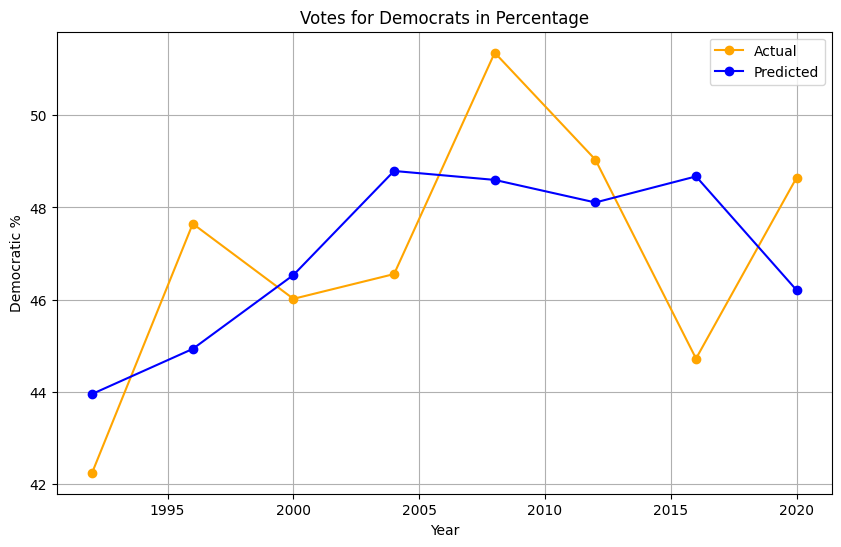

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel


file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(int)

# Function to train the model and predict for a specific year
def train_and_predict(year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'],
        'y': df_training['Democratic %'].values  # type: ignore
    }

    stan_file_train = 'model1_posterior.stan'
    model_train = CmdStanModel(stan_file=stan_file_train)
    fit_train = model_train.sample(data=stan_data_train, chains=4, seed=96)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()

    predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %'] + beta_U_train * df_testing['Unemployment %']
    mean_predicted_votes = predicted_votes_test.mean()
    mean_actual_votes = df_testing['Democratic %'].mean()

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    predicted, actual = train_and_predict(year)
    all_predicted_votes.append(predicted)
    all_actual_votes.append(actual)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

## 2nd model - Polynomial Regression Model

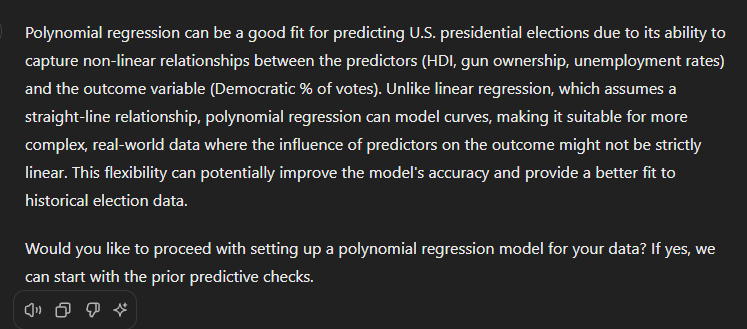

## Prior predictive checks

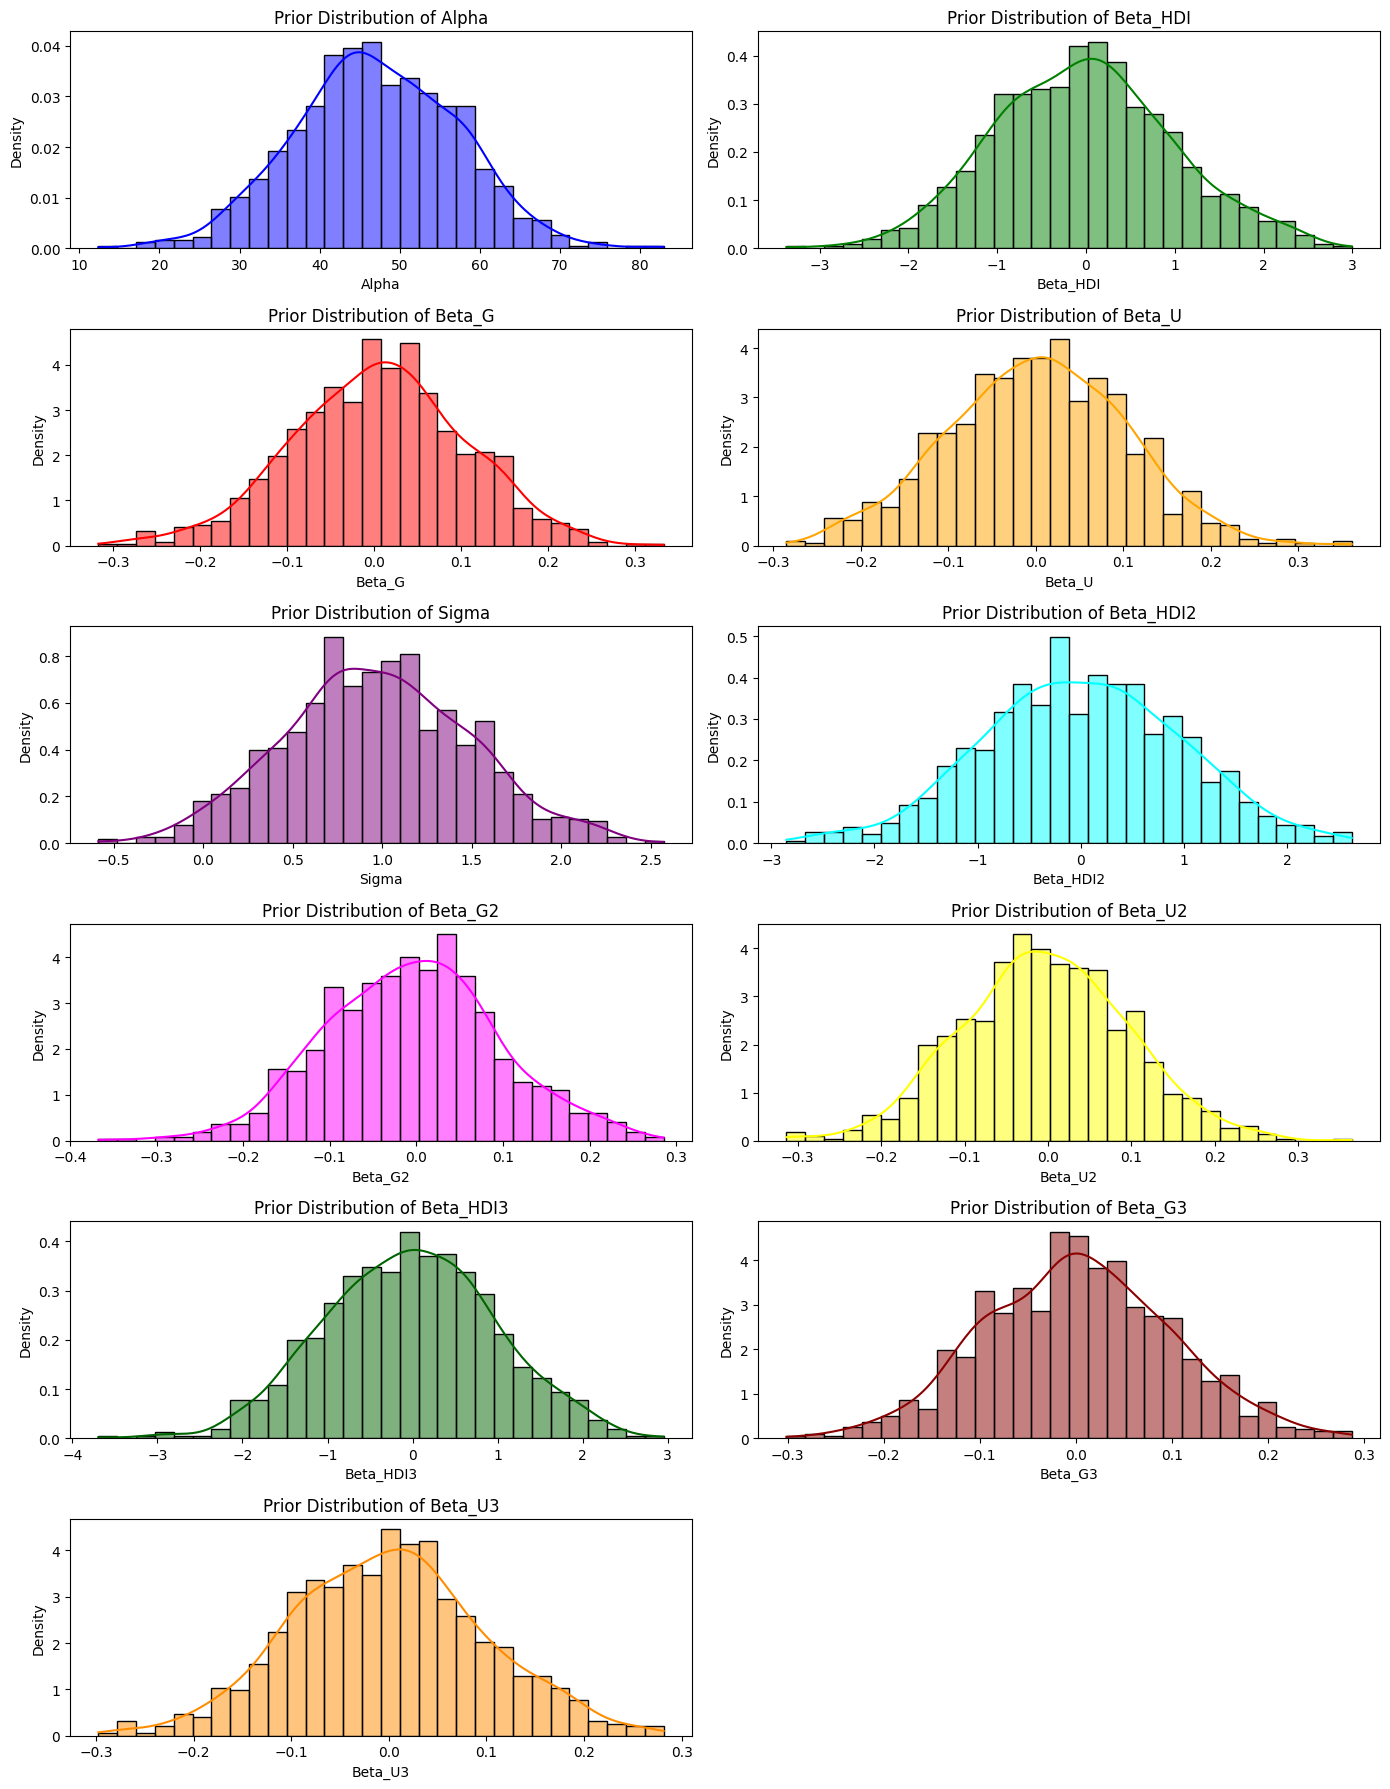

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate parameter values from the priors
n_samples = 1000
alpha_prior = np.random.normal(47, 10, n_samples)
beta_HDI_prior = np.random.normal(0, 1, n_samples)
beta_G_prior = np.random.normal(0, 0.1, n_samples)
beta_U_prior = np.random.normal(0, 0.1, n_samples)
sigma_prior = np.random.normal(1, 0.5, n_samples)
beta_HDI2_prior = np.random.normal(0, 1, n_samples)
beta_G2_prior = np.random.normal(0, 0.1, n_samples)
beta_U2_prior = np.random.normal(0, 0.1, n_samples)
beta_HDI3_prior = np.random.normal(0, 1, n_samples)
beta_G3_prior = np.random.normal(0, 0.1, n_samples)
beta_U3_prior = np.random.normal(0, 0.1, n_samples)

# Create a DataFrame for easier manipulation
priors_df = pd.DataFrame({
    'Alpha': alpha_prior,
    'Beta_HDI': beta_HDI_prior,
    'Beta_G': beta_G_prior,
    'Beta_U': beta_U_prior,
    'Sigma': sigma_prior,
    'Beta_HDI2': beta_HDI2_prior,
    'Beta_G2': beta_G2_prior,
    'Beta_U2': beta_U2_prior,
    'Beta_HDI3': beta_HDI3_prior,
    'Beta_G3': beta_G3_prior,
    'Beta_U3': beta_U3_prior
})

# Plot the distributions of the simulated prior values using seaborn
fig, axes = plt.subplots(6, 2, figsize=(14, 18))

sns.histplot(priors_df['Alpha'], bins=30, kde=True, stat="density", ax=axes[0, 0], color='blue').set_title('Prior Distribution of Alpha')
sns.histplot(priors_df['Beta_HDI'], bins=30, kde=True, stat="density", ax=axes[0, 1], color='green').set_title('Prior Distribution of Beta_HDI')
sns.histplot(priors_df['Beta_G'], bins=30, kde=True, stat="density", ax=axes[1, 0], color='red').set_title('Prior Distribution of Beta_G')
sns.histplot(priors_df['Beta_U'], bins=30, kde=True, stat="density", ax=axes[1, 1], color='orange').set_title('Prior Distribution of Beta_U')
sns.histplot(priors_df['Sigma'], bins=30, kde=True, stat="density", ax=axes[2, 0], color='purple').set_title('Prior Distribution of Sigma')
sns.histplot(priors_df['Beta_HDI2'], bins=30, kde=True, stat="density", ax=axes[2, 1], color='cyan').set_title('Prior Distribution of Beta_HDI2')
sns.histplot(priors_df['Beta_G2'], bins=30, kde=True, stat="density", ax=axes[3, 0], color='magenta').set_title('Prior Distribution of Beta_G2')
sns.histplot(priors_df['Beta_U2'], bins=30, kde=True, stat="density", ax=axes[3, 1], color='yellow').set_title('Prior Distribution of Beta_U2')
sns.histplot(priors_df['Beta_HDI3'], bins=30, kde=True, stat="density", ax=axes[4, 0], color='darkgreen').set_title('Prior Distribution of Beta_HDI3')
sns.histplot(priors_df['Beta_G3'], bins=30, kde=True, stat="density", ax=axes[4, 1], color='darkred').set_title('Prior Distribution of Beta_G3')
sns.histplot(priors_df['Beta_U3'], bins=30, kde=True, stat="density", ax=axes[5, 0], color='darkorange').set_title('Prior Distribution of Beta_U3')

# Remove the last subplot which is empty
fig.delaxes(axes[5][1])

plt.tight_layout()
plt.show()

In [29]:
# Load and prepare the data
file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(int)

# Prepare the data for Stan
stan_data = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
}

# Compile the Stan model
stan_file = 'polynomial_prior_model.stan'
model = CmdStanModel(stan_file=stan_file)

# Run the prior predictive checks
fit_prior = model.sample(data=stan_data, chains=4, seed=42)

15:47:05 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\polynomial_prior_model.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\polynomial_prior_model.exe
15:47:38 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\polynomial_prior_model.exe
15:47:38 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1


15:47:39 - cmdstanpy - INFO - CmdStan done processing.


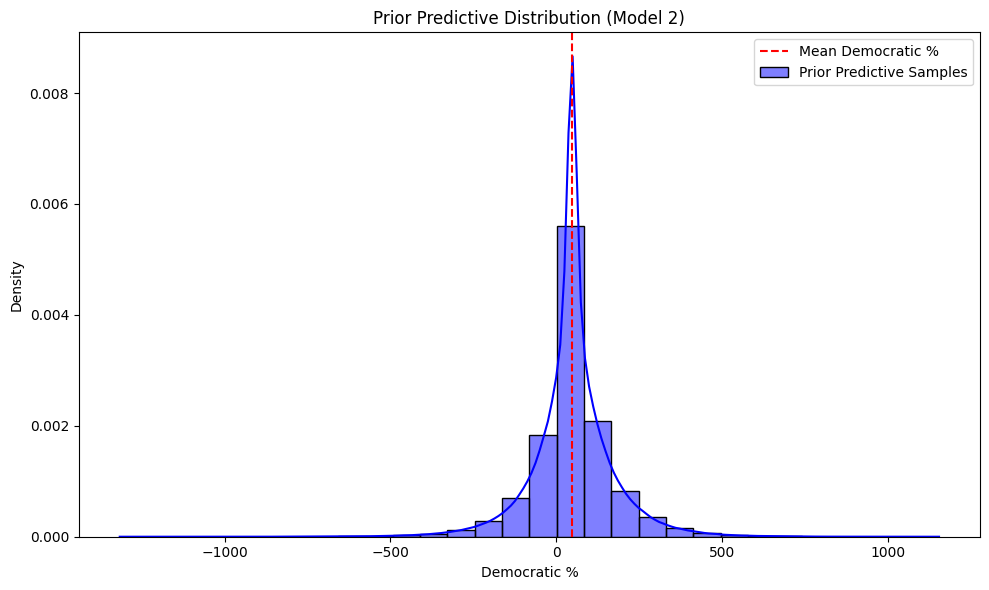

Mean Democratic %: 47.02867647058824
Min Democratic %: 21.9
Max Democratic %: 92.5


In [30]:
# Extract prior predictive samples
y_rep_prior = fit_prior.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')

# Flatten the values for plotting
y_rep_prior_flat = y_rep_prior.values.flatten()

# Plot the prior predictive samples using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples', color='blue')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution (Model 2)')
plt.tight_layout()
plt.show()

print(f"Mean Democratic %: {mean_democratic_pct}")
print(f"Min Democratic %: {data['Democratic %'].min()}")
print(f"Max Democratic %: {data['Democratic %'].max()}")

## Prior predictive distribution model 2

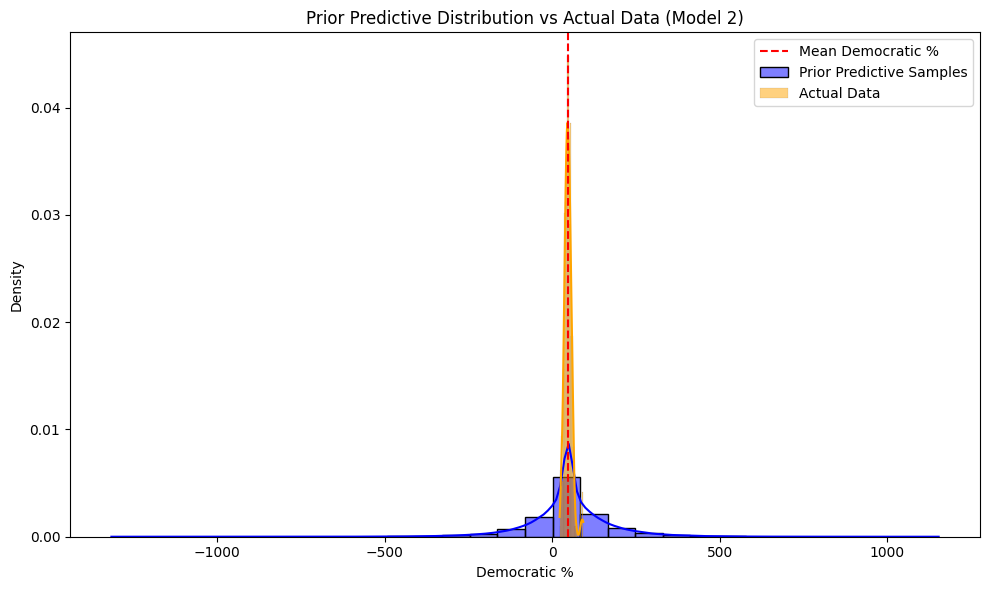

In [33]:
# Plot the prior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples', color='blue')
sns.histplot(data['Democratic %'].values, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution vs Actual Data (Model 2)')
plt.tight_layout()
# plt.xticks(np.arange(0, 101, 10))
# plt.xlim(0, 100)
plt.show()

16:26:18 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\polynomial_prior_model.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\polynomial_prior_model.exe
16:27:03 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\polynomial_prior_model.exe
16:27:04 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status

chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)




































chain 1 |██▎       | 00:17 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:21 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:22 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:22 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      


16:27:30 - cmdstanpy - INFO - CmdStan done processing.


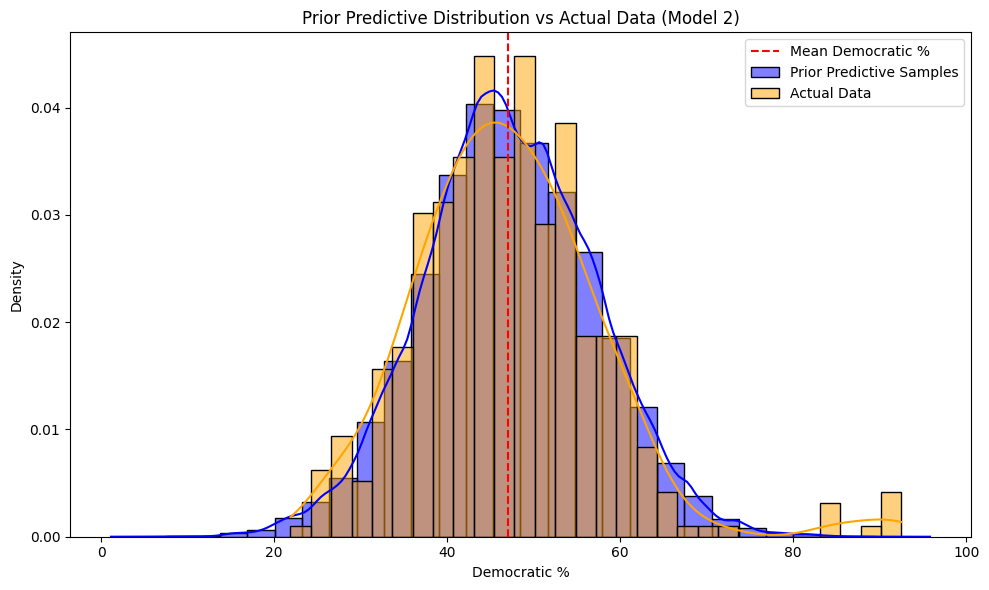

Mean Democratic %: 47.02867647058824
Min Democratic %: 21.9
Max Democratic %: 92.5


In [48]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

# Prepare the data for Stan
stan_data = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values
}

# Compile the Stan model
stan_file = 'polynomial_prior_model.stan'
model = CmdStanModel(stan_file=stan_file)

# Run the prior predictive checks
fit_prior = model.sample(data=stan_data, chains=4, seed=42, max_treedepth=15)

# Extract prior predictive samples
y_rep_prior = fit_prior.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')
y_rep_prior_flat = y_rep_prior.values.flatten()

# Plot the prior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples', color='blue')
sns.histplot(data['Democratic %'].values, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution vs Actual Data (Model 2)')
plt.tight_layout()
plt.show()

print(f"Mean Democratic %: {mean_democratic_pct}")
print(f"Min Democratic %: {data['Democratic %'].min()}")
print(f"Max Democratic %: {data['Democratic %'].max()}")

## Posterior Analysis for Model 2

In [4]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

stan_data_posterior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
    'V': data['Democratic %'].values
}

# Compile and run the posterior predictive model
stan_file_posterior = 'polynomial_posterior.stan'
model_posterior = CmdStanModel(stan_file=stan_file_posterior)
fit_prior = model_posterior.sample(data=stan_data_posterior, chains=4, seed=42, max_treedepth=25, adapt_delta=0.99)

# Print diagnostics
print(fit_posterior.diagnose())

17:33:24 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:02 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:07 Iteration:  500 / 2000 [ 25%]  (Warmup)





chain 1 |███▋      | 00:10 Iteration:  600 / 2000 [ 30%]  (Warmup)





chain 1 |████      | 00:14 Iteration:  700 / 2000 [ 35%]  (Warmup)







chain 1 |████▌     | 00:21 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▉    | 00:25 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▎   | 07:45 Iteration: 1100 / 2000 [ 55%]  (Sampling)


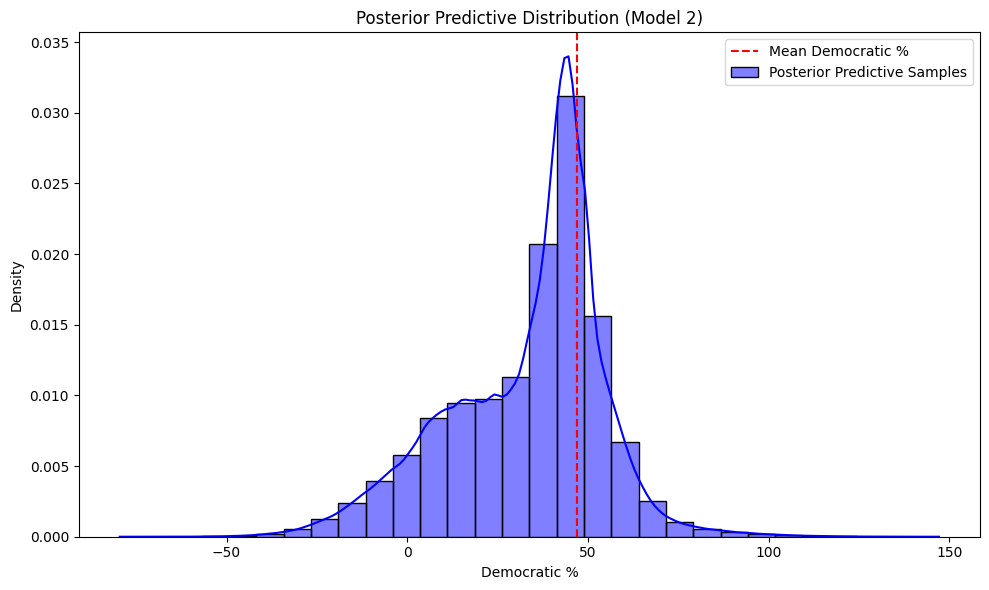

In [55]:
y_rep_posterior = fit_posterior.draws_pd()
y_rep_posterior = y_rep_posterior.filter(regex='y_rep')

# Flatten the values for plotting
y_rep_posterior_flat = y_rep_posterior.values.flatten()

# Plot the posterior predictive samples using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution (Model 2)')
plt.tight_layout()
plt.show()

## Posterior predictive distribution - model 2

In [ ]:
# Flatten the values for plotting
y_rep_posterior_flat = y_rep_posterior.values.flatten()
actual_data_flat = data['Democratic %'].values

# Plot the posterior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')
sns.histplot(actual_data_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution vs Actual Data (Model 2)')

plt.tight_layout()
plt.show()

## Parameter Marginal Distributions - model 2

In [ ]:
# Extract parameter samples for alpha, beta_HDI, beta_G, beta_U, beta_HDI2, beta_G2, beta_U2, beta_HDI3, beta_G3, beta_U3, and sigma
alpha_samples = fit_posterior.stan_variable('alpha')
beta_HDI_samples = fit_posterior.stan_variable('beta_HDI')
beta_G_samples = fit_posterior.stan_variable('beta_G')
beta_U_samples = fit_posterior.stan_variable('beta_U')
beta_HDI2_samples = fit_posterior.stan_variable('beta_HDI2')
beta_G2_samples = fit_posterior.stan_variable('beta_G2')
beta_U2_samples = fit_posterior.stan_variable('beta_U2')
beta_HDI3_samples = fit_posterior.stan_variable('beta_HDI3')
beta_G3_samples = fit_posterior.stan_variable('beta_G3')
beta_U3_samples = fit_posterior.stan_variable('beta_U3')
sigma_samples = fit_posterior.stan_variable('sigma')

# Create a DataFrame for easier manipulation
params_df = pd.DataFrame({
    'Alpha': alpha_samples,
    'Beta_HDI': beta_HDI_samples,
    'Beta_G': beta_G_samples,
    'Beta_U': beta_U_samples,
    'Beta_HDI2': beta_HDI2_samples,
    'Beta_G2': beta_G2_samples,
    'Beta_U2': beta_U2_samples,
    'Beta_HDI3': beta_HDI3_samples,
    'Beta_G3': beta_G3_samples,
    'Beta_U3': beta_U3_samples,
    'Sigma': sigma_samples
})

# Set the number of bins
bins = 30

# Plot histograms of the parameters using seaborn
fig, axes = plt.subplots(6, 2, figsize=(15, 18))
sns.histplot(params_df['Alpha'], bins=bins, kde=True, ax=axes[0, 0], stat="density", color='blue').set_title('Posterior Distribution of Alpha')
sns.histplot(params_df['Beta_HDI'], bins=bins, kde=True, ax=axes[0, 1], stat="density", color='green').set_title('Posterior Distribution of Beta_HDI')
sns.histplot(params_df['Beta_G'], bins=bins, kde=True, ax=axes[1, 0], stat="density", color='red').set_title('Posterior Distribution of Beta_G')
sns.histplot(params_df['Beta_U'], bins=bins, kde=True, ax=axes[1, 1], stat="density", color='orange').set_title('Posterior Distribution of Beta_U')
sns.histplot(params_df['Beta_HDI2'], bins=bins, kde=True, ax=axes[2, 0], stat="density", color='cyan').set_title('Posterior Distribution of Beta_HDI2')
sns.histplot(params_df['Beta_G2'], bins=bins, kde=True, ax=axes[2, 1], stat="density", color='magenta').set_title('Posterior Distribution of Beta_G2')
sns.histplot(params_df['Beta_U2'], bins=bins, kde=True, ax=axes[3, 0], stat="density", color='yellow').set_title('Posterior Distribution of Beta_U2')
sns.histplot(params_df['Beta_HDI3'], bins=bins, kde=True, ax=axes[3, 1], stat="density", color='darkgreen').set_title('Posterior Distribution of Beta_HDI3')
sns.histplot(params_df['Beta_G3'], bins=bins, kde=True, ax=axes[4, 0], stat="density", color='darkred').set_title('Posterior Distribution of Beta_G3')
sns.histplot(params_df['Beta_U3'], bins=bins, kde=True, ax=axes[4, 1], stat="density", color='darkorange').set_title('Posterior Distribution of Beta_U3')
sns.histplot(params_df['Sigma'], bins=bins, kde=True, ax=axes[5, 0], stat="density", color='purple').set_title('Posterior Distribution of Sigma')

# Remove the last subplot which is empty
fig.delaxes(axes[5][1])

plt.tight_layout()
plt.show()

# Summarize the parameters
params_summary = params_df.describe().T
print(params_summary)

# Generate trace plots to check for convergence issues
az.plot_trace(fit_posterior)
plt.show()

# Calculate and display the diagnostics
print(fit_posterior.diagnose())

## Testing our final second model

In [ ]:
def evaluate_model_with_seed(seed, data, y_rep_posterior):
    np.random.seed(seed)

    # Extract predicted values from the posterior samples
    predicted_democratic_votes = []
    for i in range(len(data)):
        sample_value = y_rep_posterior.sample(axis=0).iloc[:, i].values[0]
        predicted_democratic_votes.append(sample_value)

    # Convert the list to a DataFrame for easier manipulation
    predicted_df = pd.DataFrame({
        'Year': data['Year'],
        'Predicted_Democratic_%': predicted_democratic_votes
    })

    # Calculate mean predicted Democratic votes for each year
    mean_predicted_democratic_votes = predicted_df.groupby('Year')['Predicted_Democratic_%'].mean().values

    # Actual mean Democratic votes per year
    mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values * 100

    # Calculate Mean Squared Error
    mse = np.mean((mean_predicted_democratic_votes - mean_democratic_votes) ** 2)
    
    return mse, mean_predicted_democratic_votes

# Define the range of seeds to evaluate
seeds = range(0, 100)

best_seed = None
best_mse = float('inf')
best_predictions = None

for seed in seeds:
    mse, predictions = evaluate_model_with_seed(seed, data, y_rep_posterior)
    if mse < best_mse:
        best_mse = mse
        best_seed = seed
        best_predictions = predictions

print(f"Best Seed: {best_seed}")
print(f"Best MSE: {best_mse}")

# Unique years for plotting
unique_years = data['Year'].unique()

# Actual mean Democratic votes per year
mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values * 100

# Plot the results using the best seed
plt.figure(figsize=(10, 6))
plt.plot(unique_years, best_predictions, label="Predicted", marker='o')
plt.plot(unique_years, mean_democratic_votes, label="Actual", marker='x')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


## Creating training and testing dataframes - model 2

In [ ]:
data['Year'] = data['Year'].astype(int)

# Split the data into training (1992-2016) and testing (2020) datasets
df_training = data[data['Year'] < 2020]
df_testing = data[data['Year'] == 2020]

# Print the number of rows in training and testing datasets
print(f"Training dataset: {len(df_training)} rows")
print(f"Testing dataset: {len(df_testing)} rows")

# Prepare the data for Stan
stan_data_train = {
    'N': len(df_training),
    'HDI': df_training['HDI'].values,
    'G': df_training['Gun ownership %'].values,
    'U': df_training['Unemployment %'].values,
    'V': df_training['Democratic %'].values * 100  # type: ignore
}

stan_data_test = {
    'N': len(df_testing),
    'HDI': df_testing['HDI'].values,
    'G': df_testing['Gun ownership %'].values,
    'U': df_testing['Unemployment %'].values
}

## Training the Model on the Training Dataset - model 2

In [ ]:
# Compile the Stan model
stan_file_train = 'model_2_posterior.stan'
model_train = CmdStanModel(stan_file=stan_file_train)

# Run the model on the training data
fit_train = model_train.sample(data=stan_data_train, chains=4, seed=53)

# Extract posterior means for parameters
alpha_train = fit_train.stan_variable('alpha').mean()
beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
beta_G_train = fit_train.stan_variable('beta_G').mean()
beta_U_train = fit_train.stan_variable('beta_U').mean()
beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
beta_G2_train = fit_train.stan_variable('beta_G2').mean()
beta_U2_train = fit_train.stan_variable('beta_U2').mean()
beta_HDI3_train = fit_train.stan_variable('beta_HDI3').mean()
beta_G3_train = fit_train.stan_variable('beta_G3').mean()
beta_U3_train = fit_train.stan_variable('beta_U3').mean()
sigma_train = fit_train.stan_variable('sigma').mean()

# Print the extracted means
print(f"alpha: {alpha_train}")
print(f"beta_HDI: {beta_HDI_train}")
print(f"beta_G: {beta_G_train}")
print(f"beta_U: {beta_U_train}")
print(f"beta_HDI2: {beta_HDI2_train}")
print(f"beta_G2: {beta_G2_train}")
print(f"beta_U2: {beta_U2_train}")
print(f"beta_HDI3: {beta_HDI3_train}")
print(f"beta_G3: {beta_G3_train}")
print(f"beta_U3: {beta_U3_train}")
print(f"sigma: {sigma_train}")

## Testing the Model on the Testing Dataset - model 2

In [ ]:
# Predict the Democratic votes for each state in 2020
predicted_votes_test = (
    alpha_train +
    beta_HDI_train * df_testing['HDI'] +
    beta_G_train * df_testing['Gun ownership %'] +
    beta_U_train * df_testing['Unemployment %'] +
    beta_HDI2_train * df_testing['HDI']**2 +
    beta_G2_train * df_testing['Gun ownership %']**2 +
    beta_U2_train * df_testing['Unemployment %']**2 +
    beta_HDI3_train * df_testing['HDI']**3 +
    beta_G3_train * df_testing['Gun ownership %']**3 +
    beta_U3_train * df_testing['Unemployment %']**3
)

# Calculate the mean predicted Democratic votes for the whole country in 2020
mean_predicted_votes_2020 = predicted_votes_test.mean()

# Calculate the actual mean Democratic votes for the whole country in 2020
mean_actual_votes_2020 = df_testing['Democratic %'].mean() * 100

# Print the results
print(f"Predicted mean Democratic votes for the whole country in 2020: {mean_predicted_votes_2020:.2f}%")
print(f"Actual mean Democratic votes for the whole country in 2020: {mean_actual_votes_2020:.2f}%")


## MAE, MSE, RMSE, R2 - model 2

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(df_testing['Democratic %'].values * 100, predicted_votes_test)
mse = mean_squared_error(df_testing['Democratic %'].values * 100, predicted_votes_test)
rmse = np.sqrt(mse)
r2 = r2_score(df_testing['Democratic %'].values * 100, predicted_votes_test)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Dodać wykres z predykcji dla każdego roku bądź dla stanów - każdy z testowego - model 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data['Year'] = data['Year'].astype(int)

# Function to evaluate model with a specific seed
def evaluate_model_with_seed(seed, data, model, stan_data_train):
    np.random.seed(seed)
    fit_train = model.sample(data=stan_data_train, chains=4, seed=seed)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()
    beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
    beta_G2_train = fit_train.stan_variable('beta_G2').mean()
    beta_U2_train = fit_train.stan_variable('beta_U2').mean()
    beta_HDI3_train = fit_train.stan_variable('beta_HDI3').mean()
    beta_G3_train = fit_train.stan_variable('beta_G3').mean()
    beta_U3_train = fit_train.stan_variable('beta_U3').mean()

    predicted_votes_test = (
        alpha_train + beta_HDI_train * data['HDI'] + beta_G_train * data['Gun ownership %']
        + beta_U_train * data['Unemployment %'] + beta_HDI2_train * data['HDI']**2 
        + beta_G2_train * data['Gun ownership %']**2 + beta_U2_train * data['Unemployment %']**2
        + beta_HDI3_train * data['HDI']**3 + beta_G3_train * data['Gun ownership %']**3
        + beta_U3_train * data['Unemployment %']**3
    )

    mean_predicted_democratic_votes = predicted_votes_test.groupby(data['Year']).mean().values

    mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values * 100

    mse = np.mean((mean_predicted_democratic_votes - mean_democratic_votes) ** 2)
    
    return mse, mean_predicted_democratic_votes

# Prepare the data
stan_file_train = 'model_2_posterior.stan'
model = CmdStanModel(stan_file=stan_file_train)

# Define the range of seeds to evaluate
seeds = range(0, 100)

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values * 100  # type: ignore
    }

    best_seed = None
    best_mse = float('inf')
    best_predictions = None

    for seed in seeds:
        mse, predictions = evaluate_model_with_seed(seed, df_testing, model, stan_data_train)
        if mse < best_mse:
            best_mse = mse
            best_seed = seed
            best_predictions = predictions

    print(f"Best seed for {year}: {best_seed}")
    all_predicted_votes.append(best_predictions.mean())
    all_actual_votes.append(df_testing['Democratic %'].mean() * 100)

# Plot the results
unique_years = years
plt.figure(figsize=(10, 6))
plt.plot(unique_years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(unique_years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Plot the results
unique_years = years
plt.figure(figsize=(10, 6))
plt.plot(unique_years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(unique_years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Convert Year to int
data['Year'] = data['Year'].astype(int)

# Function to train the model and make predictions for a specific state
def train_and_predict_state(state, years):
    state_data = data[data['State'] == state]
    
    actuals = []
    predictions = []

    for year in years:
        df_training = state_data[state_data['Year'] != year]
        df_testing = state_data[state_data['Year'] == year]

        if df_testing.empty:
            continue
        
        stan_data_train = {
            'N': len(df_training),
            'HDI': df_training['HDI'].values,
            'G': df_training['Gun ownership %'].values,
            'U': df_training['Unemployment %'].values,
            'V': df_training['Democratic %'].values * 100  # type: ignore
        }

        stan_file_train = 'model_2_posterior.stan'
        model = CmdStanModel(stan_file=stan_file_train)
        fit_train = model.sample(data=stan_data_train, chains=4, seed=47, show_progress=False)

        alpha_train = fit_train.stan_variable('alpha').mean()
        beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
        beta_G_train = fit_train.stan_variable('beta_G').mean()
        beta_U_train = fit_train.stan_variable('beta_U').mean()
        beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
        beta_G2_train = fit_train.stan_variable('beta_G2').mean()
        beta_U2_train = fit_train.stan_variable('beta_U2').mean()
        beta_HDI3_train = fit_train.stan_variable('beta_HDI3').mean()
        beta_G3_train = fit_train.stan_variable('beta_G3').mean()
        beta_U3_train = fit_train.stan_variable('beta_U3').mean()

        predicted_votes_test = (
            alpha_train + beta_HDI_train * df_testing['HDI'].values + beta_G_train * df_testing['Gun ownership %'].values
            + beta_U_train * df_testing['Unemployment %'].values + beta_HDI2_train * df_testing['HDI'].values**2 
            + beta_G2_train * df_testing['Gun ownership %'].values**2 + beta_U2_train * df_testing['Unemployment %'].values**2
            + beta_HDI3_train * df_testing['HDI'].values**3 + beta_G3_train * df_testing['Gun ownership %'].values**3
            + beta_U3_train * df_testing['Unemployment %'].values**3
        )

        predictions.append(predicted_votes_test.mean())
        actuals.append(df_testing['Democratic %'].mean() * 100)
    
    return actuals, predictions

# Define the years and states
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
states = data['State'].unique()

# Plot the results for each state
for state in states:
    actuals, predictions = train_and_predict_state(state, years)
    plt.figure(figsize=(10, 6))
    plt.plot(years, actuals, label=f'Actual {state}', linestyle='--', marker='o', color='orange')
    plt.plot(years, predictions, label=f'Predicted {state}', linestyle='-', marker='x', color='blue')
    plt.xlabel('Year')
    plt.ylabel('Democratic %')
    plt.title(f'Votes for Democrats in Percentage in {state}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{state}_predictions.png')
    plt.close()  # Close the figure to avoid displaying it

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Convert Year to int
data['Year'] = data['Year'].astype(int)

# Function to train the model and make predictions for Alabama
def train_and_predict_state(state, years):
    state_data = data[data['State'] == state]
    
    actuals = []
    predictions = []

    for year in years:
        df_training = state_data[state_data['Year'] != year]
        df_testing = state_data[state_data['Year'] == year]

        if df_testing.empty:
            continue
        
        stan_data_train = {
            'N': len(df_training),
            'HDI': df_training['HDI'].values,
            'G': df_training['Gun ownership %'].values,
            'U': df_training['Unemployment %'].values,
            'V': df_training['Democratic %'].values * 100  # type: ignore
        }

        stan_file_train = 'model_2_posterior.stan'
        model = CmdStanModel(stan_file=stan_file_train)
        fit_train = model.sample(data=stan_data_train, chains=4, seed=53)

        alpha_train = fit_train.stan_variable('alpha').mean()
        beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
        beta_G_train = fit_train.stan_variable('beta_G').mean()
        beta_U_train = fit_train.stan_variable('beta_U').mean()
        beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
        beta_G2_train = fit_train.stan_variable('beta_G2').mean()
        beta_U2_train = fit_train.stan_variable('beta_U2').mean()
        beta_HDI3_train = fit_train.stan_variable('beta_HDI3').mean()
        beta_G3_train = fit_train.stan_variable('beta_G3').mean()
        beta_U3_train = fit_train.stan_variable('beta_U3').mean()

        predicted_votes_test = (
            alpha_train + beta_HDI_train * df_testing['HDI'].values + beta_G_train * df_testing['Gun ownership %'].values
            + beta_U_train * df_testing['Unemployment %'].values + beta_HDI2_train * df_testing['HDI'].values**2 
            + beta_G2_train * df_testing['Gun ownership %'].values**2 + beta_U2_train * df_testing['Unemployment %'].values**2
            + beta_HDI3_train * df_testing['HDI'].values**3 + beta_G3_train * df_testing['Gun ownership %'].values**3
            + beta_U3_train * df_testing['Unemployment %'].values**3
        )

        predictions.append(predicted_votes_test.mean())
        actuals.append(df_testing['Democratic %'].mean() * 100)
    
    return actuals, predictions

# Define the years
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

# Plot the results for Alabama
state = 'Alabama'
actuals, predictions = train_and_predict_state(state, years)

plt.figure(figsize=(10, 6))
plt.plot(years, actuals, label=f'Actual {state}', linestyle='--', marker='o', color='orange')
plt.plot(years, predictions, label=f'Predicted {state}', linestyle='-', marker='x', color='blue')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title(f'Votes for Democrats in Percentage in {state}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Convert Year to int
data['Year'] = data['Year'].astype(int)

# Function to evaluate model with a specific seed
def evaluate_model_with_seed(seed, df_training, df_testing, model, stan_data_train):
    np.random.seed(seed)
    fit_train = model.sample(data=stan_data_train, chains=4, seed=seed)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()
    beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
    beta_G2_train = fit_train.stan_variable('beta_G2').mean()
    beta_U2_train = fit_train.stan_variable('beta_U2').mean()
    beta_HDI3_train = fit_train.stan_variable('beta_HDI3').mean()
    beta_G3_train = fit_train.stan_variable('beta_G3').mean()
    beta_U3_train = fit_train.stan_variable('beta_U3').mean()

    predicted_votes_test = (
        alpha_train + beta_HDI_train * df_testing['HDI'].values + beta_G_train * df_testing['Gun ownership %'].values
        + beta_U_train * df_testing['Unemployment %'].values + beta_HDI2_train * df_testing['HDI'].values**2 
        + beta_G2_train * df_testing['Gun ownership %'].values**2 + beta_U2_train * df_testing['Unemployment %'].values**2
        + beta_HDI3_train * df_testing['HDI'].values**3 + beta_G3_train * df_testing['Gun ownership %'].values**3
        + beta_U3_train * df_testing['Unemployment %'].values**3
    )

    mse = np.mean((predicted_votes_test - df_testing['Democratic %'].values * 100) ** 2)
    
    return mse, predicted_votes_test

# Function to train the model and make predictions for Alabama with the best seed
def train_and_predict_state_with_best_seed(state, years, seeds):
    state_data = data[data['State'] == state]
    
    actuals = []
    predictions = []

    for year in years:
        df_training = state_data[state_data['Year'] != year]
        df_testing = state_data[state_data['Year'] == year]

        if df_testing.empty:
            continue
        
        stan_data_train = {
            'N': len(df_training),
            'HDI': df_training['HDI'].values,
            'G': df_training['Gun ownership %'].values,
            'U': df_training['Unemployment %'].values,
            'V': df_training['Democratic %'].values * 100  # type: ignore
        }

        stan_file_train = 'model_2_posterior.stan'
        model = CmdStanModel(stan_file=stan_file_train)

        best_seed = None
        best_mse = float('inf')
        best_predictions = None

        for seed in seeds:
            mse, predictions_test = evaluate_model_with_seed(seed, df_training, df_testing, model, stan_data_train)
            if mse < best_mse:
                best_mse = mse
                best_seed = seed
                best_predictions = predictions_test.mean()

        print(f"Best seed for {year}: {best_seed}")
        predictions.append(best_predictions)
        actuals.append(df_testing['Democratic %'].mean() * 100)
    
    return actuals, predictions

# Define the years and seeds
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
seeds = range(45, 55)

# Plot the results for Alabama
state = 'Alabama'
actuals, predictions = train_and_predict_state_with_best_seed(state, years, seeds)

plt.figure(figsize=(10, 6))
plt.plot(years, actuals, label=f'Actual {state}', linestyle='--', marker='o', color='orange')
plt.plot(years, predictions, label=f'Predicted {state}', linestyle='-', marker='x', color='blue')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title(f'Votes for Democrats in Percentage in {state}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Convert Year to int
data['Year'] = data['Year'].astype(int)

# Standardize the predictors
data['HDI_std'] = (data['HDI'] - data['HDI'].mean()) / data['HDI'].std()
data['Gun_ownership_std'] = (data['Gun ownership %'] - data['Gun ownership %'].mean()) / data['Gun ownership %'].std()
data['Unemployment_std'] = (data['Unemployment %'] - data['Unemployment %'].mean()) / data['Unemployment %'].std()

# Function to train the model and make predictions for each state
def train_and_predict_state(state, years):
    state_data = data[data['State'] == state]
    
    actuals = []
    predictions = []

    for year in years:
        df_training = state_data[state_data['Year'] != year]
        df_testing = state_data[state_data['Year'] == year]

        if df_testing.empty:
            continue
        
        stan_data_train = {
            'N': len(df_training),
            'HDI': df_training['HDI_std'].values,
            'G': df_training['Gun_ownership_std'].values,
            'U': df_training['Unemployment_std'].values,
            'V': df_training['Democratic %'].values * 100  # type: ignore
        }

        stan_file_train = 'model_2_posterior.stan'
        model = CmdStanModel(stan_file=stan_file_train)
        fit_train = model.sample(data=stan_data_train, chains=4, seed=47)

        alpha_train = fit_train.stan_variable('alpha').mean()
        beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
        beta_G_train = fit_train.stan_variable('beta_G').mean()
        beta_U_train = fit_train.stan_variable('beta_U').mean()
        beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
        beta_G2_train = fit_train.stan_variable('beta_G2').mean()
        beta_U2_train = fit_train.stan_variable('beta_U2').mean()
        beta_HDI3_train = fit_train.stan_variable('beta_HDI3').mean()
        beta_G3_train = fit_train.stan_variable('beta_G3').mean()
        beta_U3_train = fit_train.stan_variable('beta_U3').mean()

        predicted_votes_test = (
            alpha_train + beta_HDI_train * df_testing['HDI_std'].values + beta_G_train * df_testing['Gun_ownership_std'].values
            + beta_U_train * df_testing['Unemployment_std'].values + beta_HDI2_train * df_testing['HDI_std'].values**2 
            + beta_G2_train * df_testing['Gun_ownership_std'].values**2 + beta_U2_train * df_testing['Unemployment_std'].values**2
            + beta_HDI3_train * df_testing['HDI_std'].values**3 + beta_G3_train * df_testing['Gun_ownership_std'].values**3
            + beta_U3_train * df_testing['Unemployment_std'].values**3
        )

        predictions.append(predicted_votes_test.mean())
        actuals.append(df_testing['Democratic %'].mean() * 100)
    
    return actuals, predictions

# Define the years and states
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
state = 'Alabama'

# Plot the results for the specified state
plt.figure(figsize=(14, 10))

actuals, predictions = train_and_predict_state(state, years)
plt.plot(years, actuals, label=f'Actual {state}', linestyle='--', marker='o')
plt.plot(years, predictions, label=f'Predicted {state}', linestyle='-', marker='x')

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title(f'Votes for Democrats in Percentage in {state}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Filter data for Alabama
state = 'Alabama'
state_data = data[data['State'] == state]

# Convert Year to int
state_data['Year'] = state_data['Year'].astype(int)

# Define the years for training and testing
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

# Function to train the model and make predictions for each year
def train_and_predict(year):
    df_training = state_data[state_data['Year'] != year]
    df_testing = state_data[state_data['Year'] == year]

    if df_testing.empty:
        return None, None

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values * 100  # type: ignore
    }

    stan_file_train = 'test_model.stan'
    model = CmdStanModel(stan_file=stan_file_train)
    fit_train = model.sample(data=stan_data_train, chains=4, seed=47)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()

    predicted_votes_test = (
        alpha_train + beta_HDI_train * df_testing['HDI'].values + beta_G_train * df_testing['Gun ownership %'].values
        + beta_U_train * df_testing['Unemployment %'].values
    )

    actual_votes = df_testing['Democratic %'].values * 100

    return actual_votes.mean(), predicted_votes_test.mean()

# Evaluate the model for each year
actuals = []
predictions = []

for year in years:
    actual, predicted = train_and_predict(year)
    if actual is not None and predicted is not None:
        actuals.append(actual)
        predictions.append(predicted)

# Plot the results
plt.figure(figsize=(14, 10))
plt.plot(years, actuals, label=f'Actual {state}', linestyle='--', marker='o')
plt.plot(years, predictions, label=f'Predicted {state}', linestyle='-', marker='x')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title(f'Votes for Democrats in Percentage in {state}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Convert Year to int
data['Year'] = data['Year'].astype(int)

# Function to train the model and make predictions for each state
def train_and_predict_state(state, years):
    state_data = data[data['State'] == state]
    
    actuals = []
    predictions = []

    for year in years:
        df_training = state_data[state_data['Year'] != year]
        df_testing = state_data[state_data['Year'] == year]

        if df_testing.empty:
            continue
        
        stan_data_train = {
            'N': len(df_training),
            'HDI': df_training['HDI'].values,
            'G': df_training['Gun ownership %'].values,
            'U': df_training['Unemployment %'].values,
            'V': df_training['Democratic %'].values * 100  # type: ignore
        }

        stan_file_train = 'model_2_posterior.stan'
        model = CmdStanModel(stan_file=stan_file_train)
        fit_train = model.sample(data=stan_data_train, chains=4, seed=47)

        alpha_train = fit_train.stan_variable('alpha').mean()
        beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
        beta_G_train = fit_train.stan_variable('beta_G').mean()
        beta_U_train = fit_train.stan_variable('beta_U').mean()
        beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
        beta_G2_train = fit_train.stan_variable('beta_G2').mean()
        beta_U2_train = fit_train.stan_variable('beta_U2').mean()
        beta_HDI3_train = fit_train.stan_variable('beta_HDI3').mean()
        beta_G3_train = fit_train.stan_variable('beta_G3').mean()
        beta_U3_train = fit_train.stan_variable('beta_U3').mean()

        predicted_votes_test = (
            alpha_train + beta_HDI_train * df_testing['HDI'].values + beta_G_train * df_testing['Gun ownership %'].values
            + beta_U_train * df_testing['Unemployment %'].values + beta_HDI2_train * df_testing['HDI'].values**2 
            + beta_G2_train * df_testing['Gun ownership %'].values**2 + beta_U2_train * df_testing['Unemployment %'].values**2
            + beta_HDI3_train * df_testing['HDI'].values**3 + beta_G3_train * df_testing['Gun ownership %'].values**3
            + beta_U3_train * df_testing['Unemployment %'].values**3
        )

        predictions.append(predicted_votes_test.mean())
        actuals.append(df_testing['Democratic %'].mean() * 100)
    
    return actuals, predictions

# Define the years and states
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
state = 'Alabama'  # Example state

# Plot the results
plt.figure(figsize=(14, 10))

actuals, predictions = train_and_predict_state(state, years)
plt.plot(years, actuals, label=f'Actual {state}', linestyle='--', marker='o')
plt.plot(years, predictions, label=f'Predicted {state}', linestyle='-', marker='x')

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title(f'Votes for Democrats in Percentage in {state}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()